# Introduction

The technical aim of this project is to practice and demonstrate the employment of logistic regression, by training and testing multiple supervised ensemble methods of machine learning. I will be performing a ternary classification of the functionality of water wells in Tanzania, using data from taarifa, an open-source API, and the Tanzanian Ministry of Water.

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Obtain Data
Here we are importing the data obtained from the DrivenData competition, "Pump it Up: Data Mining the Water Table". There are separate dataframes for training values, training labels, and test values.
We are going to merge the training labels to the training values set.


In [2]:
pd.set_option('display.max_columns', None)
labels = pd.read_csv('trainingsetlabels.csv')
df = pd.read_csv('trainingsetvalues.csv')
test_set = pd.read_csv('testsetvalues.csv')

Let's check our labels dataframe for any missing values before we merge it with our training values dataframe.

In [143]:
print(labels.head())
print('\n')
print(labels.info())
print('\n')
print(labels.isna().sum())

      id    status_group
0  69572      functional
1   8776      functional
2  34310      functional
3  67743  non functional
4  19728      functional


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
id              59400 non-null int64
status_group    59400 non-null object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB
None


id              0
status_group    0
dtype: int64


Our training labels set looks good. Let's just get a glance at our values and see what they are looking like.

In [3]:
df.head(10)

id  amount_tsh date_recorded               funder  gps_height  \
0  69572      6000.0    2011-03-14                Roman        1390   
1   8776         0.0    2013-03-06              Grumeti        1399   
2  34310        25.0    2013-02-25         Lottery Club         686   
3  67743         0.0    2013-01-28               Unicef         263   
4  19728         0.0    2011-07-13          Action In A           0   
5   9944        20.0    2011-03-13  Mkinga Distric Coun           0   
6  19816         0.0    2012-10-01                 Dwsp           0   
7  54551         0.0    2012-10-09                Rwssp           0   
8  53934         0.0    2012-11-03             Wateraid           0   
9  46144         0.0    2011-08-03          Isingiro Ho           0   

      installer  longitude   latitude              wpt_name  num_private  \
0         Roman  34.938093  -9.856322                  none            0   
1       GRUMETI  34.698766  -2.147466              Zahanati            0   
2  World vision  37.460664  -3.821329           Kwa Mahundi            0   
3        UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu            0   
4       Artisan  31.130847  -1.825359               Shuleni            0   
5           DWE  39.172796  -4.765587                Tajiri            0   
6          DWSP  33.362410  -3.766365            Kwa Ngomho            0   
7           DWE  32.620617  -4.226198          Tushirikiane            0   
8     Water Aid  32.711100  -5.146712     Kwa Ramadhan Musa            0   
9       Artisan  30.626991  -1.257051               Kwapeto            0   

                     basin       subvillage     region  region_code  \
0               Lake Nyasa         Mnyusi B     Iringa           11   
1            Lake Victoria          Nyamara       Mara           20   
2                  Pangani          Majengo    Manyara           21   
3  Ruvuma / Southern Coast       Mahakamani     Mtwara           90   
4            Lake Victoria       Kyanyamisa     Kagera           18   
5                  Pangani      Moa/Mwereme      Tanga            4   
6                 Internal    Ishinabulandi  Shinyanga           17   
7          Lake Tanganyika  Nyawishi Center  Shinyanga           17   
8          Lake Tanganyika       Imalauduki     Tabora           14   
9            Lake Victoria         Mkonomre     Kagera           18   

   district_code              lga        ward  population public_meeting  \
0              5           Ludewa    Mundindi         109           True   
1              2        Serengeti       Natta         280            NaN   
2              4        Simanjiro     Ngorika         250           True   
3             63         Nanyumbu    Nanyumbu          58           True   
4              1          Karagwe  Nyakasimbi           0           True   
5              8           Mkinga         Moa           1           True   
6              3  Shinyanga Rural      Samuye           0           True   
7              3           Kahama      Chambo           0           True   
8              6     Tabora Urban    Itetemia           0           True   
9              1          Karagwe      Kaisho           0           True   

               recorded_by scheme_management                  scheme_name  \
0  GeoData Consultants Ltd               VWC                        Roman   
1  GeoData Consultants Ltd             Other                          NaN   
2  GeoData Consultants Ltd               VWC  Nyumba ya mungu pipe scheme   
3  GeoData Consultants Ltd               VWC                          NaN   
4  GeoData Consultants Ltd               NaN                          NaN   
5  GeoData Consultants Ltd               VWC                    Zingibali   
6  GeoData Consultants Ltd               VWC                          NaN   
7  GeoData Consultants Ltd               NaN                          NaN   
8  GeoData Consultants Ltd               VWC                          NaN  

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [146]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
id                       14850 non-null int64
amount_tsh               14850 non-null float64
date_recorded            14850 non-null object
funder                   13981 non-null object
gps_height               14850 non-null int64
installer                13973 non-null object
longitude                14850 non-null float64
latitude                 14850 non-null float64
wpt_name                 14850 non-null object
num_private              14850 non-null int64
basin                    14850 non-null object
subvillage               14751 non-null object
region                   14850 non-null object
region_code              14850 non-null int64
district_code            14850 non-null int64
lga                      14850 non-null object
ward                     14850 non-null object
population               14850 non-null int64
public_meeting           14029 non-null object
r

Let's merge our training values and training labels datasets before we start to clean the training values set, just in case we have to drop any rows.

In [147]:
data = df.merge(labels, on='id')

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

Looks good- the 'status_group' column is now in! 
Now, since we have a ton of cleaning to do in both our test values set and our training values set, we are going to merge the two and perform all cleaning on one combined set. More efficient is better! We will then separate the sets back, before our modeling.

In [149]:
data = pd.concat([data, test_set], sort=False) #sort=False will keep the 'status_group' on the end of our table

In [150]:
data.head(20)

id  amount_tsh date_recorded                   funder  gps_height  \
0   69572      6000.0    2011-03-14                    Roman        1390   
1    8776         0.0    2013-03-06                  Grumeti        1399   
2   34310        25.0    2013-02-25             Lottery Club         686   
3   67743         0.0    2013-01-28                   Unicef         263   
4   19728         0.0    2011-07-13              Action In A           0   
5    9944        20.0    2011-03-13      Mkinga Distric Coun           0   
6   19816         0.0    2012-10-01                     Dwsp           0   
7   54551         0.0    2012-10-09                    Rwssp           0   
8   53934         0.0    2012-11-03                 Wateraid           0   
9   46144         0.0    2011-08-03              Isingiro Ho           0   
10  49056         0.0    2011-02-20                  Private          62   
11  50409       200.0    2013-02-18                   Danida        1062   
12  36957         0.0    2012-10-14             World Vision           0   
13  50495         0.0    2013-03-15  Lawatefuka Water Supply        1368   
14  53752         0.0    2012-10-20                    Biore           0   
15  61848         0.0    2011-08-04                    Rudep        1645   
16  48451       500.0    2011-07-04                   Unicef        1703   
17  58155         0.0    2011-09-04                   Unicef        1656   
18  34169         0.0    2011-07-22                   Hesawa        1162   
19  18274       500.0    2011-02-22                   Danida        1763   

               installer  longitude   latitude                wpt_name  \
0                  Roman  34.938093  -9.856322                    none   
1                GRUMETI  34.698766  -2.147466                Zahanati   
2           World vision  37.460664  -3.821329             Kwa Mahundi   
3                 UNICEF  38.486161 -11.155298    Zahanati Ya Nanyumbu   
4                Artisan  31.130847  -1.825359                 Shuleni   
5                    DWE  39.172796  -4.765587                  Tajiri   
6                   DWSP  33.362410  -3.766365              Kwa Ngomho   
7                    DWE  32.620617  -4.226198            Tushirikiane   
8              Water Aid  32.711100  -5.146712       Kwa Ramadhan Musa   
9                Artisan  30.626991  -1.257051                 Kwapeto   
10               Private  39.209518  -7.034139           Mzee Hokororo   
11                DANIDA  35.770258 -10.574175        Kwa Alid Nchimbi   
12          World vision  33.798106  -3.290194                   Pamba   
13  Lawatefuka water sup  37.092574  -3.181783    Kwa John Izack Mmari   
14                WEDECO  34.364073  -3.629333               Mwabasabi   
15                   DWE  31.444121  -8.274962  Kwa Juvenal Ching'Ombe   
16                   DWE  34.642439  -9.106185         Kwa John Mtenzi   
17                   DWE  34.569266  -9.085515         Kwa Rose Chaula   
18                   DWE  32.920154  -1.947868                  Ngomee   
19                 Danid  34.508967  -9.894412                    none   

    num_private                    basin       subvillage       region  \
0             0               Lake Nyasa         Mnyusi B       Iringa   
1             0            Lake Victoria          Nyamara         Mara   
2             0                  Pangani          Majengo      Manyara   
3             0  Ruvuma / Southern Coast       Mahakamani       Mtwara   
4             0            Lake Victoria       Kyanyamisa       Kagera   
5             0                  Pangani      Moa/Mwereme        Tanga   
6             0                 Internal    Ishinabulandi    Shinyanga   
7             0          Lake Tanganyika  Nyawishi Center    Shinyanga   
8             0          Lake Tanganyika       Imalauduki       Tabora   
9             0            Lake Victoria         Mkonomre       Kagera   
10            0              Wami / Ruvu 

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74250 entries, 0 to 14849
Data columns (total 41 columns):
id                       74250 non-null int64
amount_tsh               74250 non-null float64
date_recorded            74250 non-null object
funder                   69746 non-null object
gps_height               74250 non-null int64
installer                69718 non-null object
longitude                74250 non-null float64
latitude                 74250 non-null float64
wpt_name                 74250 non-null object
num_private              74250 non-null int64
basin                    74250 non-null object
subvillage               73780 non-null object
region                   74250 non-null object
region_code              74250 non-null int64
district_code            74250 non-null int64
lga                      74250 non-null object
ward                     74250 non-null object
population               74250 non-null int64
public_meeting           70095 non-null object
r

In [152]:
data.status_group.value_counts(dropna=False)

functional                 32259
non functional             22824
NaN                        14850
functional needs repair     4317
Name: status_group, dtype: int64

Looks good. We can notice that there are the same amount of NaN values as were total rows in our testing values set. We will use these 'NaN' values to re-separate the cleaned data set later. 

Now let's begin the cleaning, looking at the values for each column.

## Cleaning our data
### Dealing with missing values

In [153]:
data.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    4504
gps_height                   0
installer                 4532
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 470
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            4155
recorded_by                  0
scheme_management         4846
scheme_name              35258
permit                    3793
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

#### "funder"

In [154]:
data.funder.value_counts(dropna=False, normalize=True).head()

Government Of Tanzania    0.152175
NaN                       0.060660
Danida                    0.052620
Hesawa                    0.037468
Rwssp                     0.022936
Name: funder, dtype: float64

There are quite a few different funders for the water wells- 1897 to be exact! 6% of which are N/A. Since this is not a continuous feature, let's sub our NaN values for the string 'unknown'. 

In [155]:
data.funder.fillna("unknown", inplace=True)

In [156]:
data.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                       0
gps_height                   0
installer                 4532
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 470
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            4155
recorded_by                  0
scheme_management         4846
scheme_name              35258
permit                    3793
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

#### "installer"

In [157]:
data.installer.value_counts(dropna=False, normalize=True).head()

DWE           0.292943
NaN           0.061037
Government    0.030734
RWE           0.020175
Commu         0.018141
Name: installer, dtype: float64

The greatest amount of wells are installed by DWE at 29%, and the second greatest are NaN values and 06%. Let's fill these NaN values with "unknown" for now.

In [158]:
data.installer.fillna("unknown", inplace=True)

In [159]:
data.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                       0
gps_height                   0
installer                    0
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 470
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            4155
recorded_by                  0
scheme_management         4846
scheme_name              35258
permit                    3793
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

#### "subvillage"

In [160]:
data.subvillage.value_counts(dropna=False, normalize=True).head()

Shuleni     0.008700
Majengo     0.008498
Madukani    0.008471
NaN         0.006330
Kati        0.006290
Name: subvillage, dtype: float64

In [161]:
data.subvillage.nunique()

21425

There is some extreme cardinality here for a location-identifying category. This won't work with our model because there are 20617 unique names. Since we have an id and geographic coordinates for location, let's drop this column.

In [162]:
data.drop(['subvillage'], axis=1, inplace=True)

In [163]:
data.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                       0
gps_height                   0
installer                    0
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            4155
recorded_by                  0
scheme_management         4846
scheme_name              35258
permit                    3793
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

#### "public_meeting"

In [164]:
data.public_meeting.value_counts(normalize=True)

True     0.909466
False    0.090534
Name: public_meeting, dtype: float64

In [165]:
data.public_meeting.fillna(pd.Series(np.random.choice([True, False], 
                                                      p=[0.91, 0.09], size=len(data))), inplace=True)

In [166]:
data.public_meeting.value_counts(dropna=False)

True     67545
False     6705
Name: public_meeting, dtype: int64

In [167]:
print(data.isna().sum())
print('\n')
print('Total Remaining Data Points:', len(data))

id                           0
amount_tsh                   0
date_recorded                0
funder                       0
gps_height                   0
installer                    0
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting               0
recorded_by                  0
scheme_management         4846
scheme_name              35258
permit                    3793
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

#### 'scheme management'

In [168]:
data.scheme_management.value_counts(normalize=True, dropna=False)

VWC                 0.618411
WUG                 0.087488
NaN                 0.065266
Water authority     0.053535
WUA                 0.047825
Water Board         0.046626
Parastatal          0.028606
Company             0.018061
Private operator    0.017859
Other               0.013414
SWC                 0.001657
Trust               0.001239
None                0.000013
Name: scheme_management, dtype: float64

6.5% of our values are null and this is another object category- Let's assign "unknown" to the missing/NaN values.

In [169]:
data.scheme_management.fillna("unknown", inplace=True)

In [170]:
data.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                       0
gps_height                   0
installer                    0
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting               0
recorded_by                  0
scheme_management            0
scheme_name              35258
permit                    3793
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

#### "scheme_name"

In [171]:
data.scheme_name.value_counts(normalize=True, dropna=False)

NaN                           0.474855
K                             0.011556
None                          0.010694
Borehole                      0.009481
Chalinze wate                 0.006747
                                ...   
Charles Mushi  Branch line    0.000013
Borehoole                     0.000013
TM part Three water supply    0.000013
BL Ormelili                   0.000013
Chikombo water supply         0.000013
Name: scheme_name, Length: 2869, dtype: float64

47% of the values are missing- not nice! Let's investigate further.

In [172]:
data.head()

id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0    2011-03-14         Roman        1390         Roman   
1   8776         0.0    2013-03-06       Grumeti        1399       GRUMETI   
2  34310        25.0    2013-02-25  Lottery Club         686  World vision   
3  67743         0.0    2013-01-28        Unicef         263        UNICEF   
4  19728         0.0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name  num_private  \
0  34.938093  -9.856322                  none            0   
1  34.698766  -2.147466              Zahanati            0   
2  37.460664  -3.821329           Kwa Mahundi            0   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0   
4  31.130847  -1.825359               Shuleni            0   

                     basin   region  region_code  district_code        lga  \
0               Lake Nyasa   Iringa           11              5     Ludewa   
1            Lake Victoria     Mara           20              2  Serengeti   
2                  Pangani  Manyara           21              4  Simanjiro   
3  Ruvuma / Southern Coast   Mtwara           90             63   Nanyumbu   
4            Lake Victoria   Kagera           18              1    Karagwe   

         ward  population  public_meeting              recorded_by  \
0    Mundindi         109            True  GeoData Consultants Ltd   
1       Natta         280            True  GeoData Consultants Ltd   
2     Ngorika         250            True  GeoData Consultants Ltd   
3    Nanyumbu          58            True  GeoData Consultants Ltd   
4  Nyakasimbi           0            True  GeoData Consultants Ltd   

  scheme_management                  scheme_name permit  construction_year  \
0               VWC                        Roman  False               1999   
1             Other                          NaN   True               2010   
2               VWC  Nyumba ya mungu pipe scheme   True               2009   
3               VWC                          NaN   True               1986   
4           unknown                          NaN   True                  0   

  extraction_type extraction_type_group extraction_type_class management  \
0         gravity               gravity               gravity        vwc   
1         gravity               gravity               gravity        wug   
2         gravity               gravity               gravity        vwc   
3     submersible           submersible           submersible        vwc   
4         gravity               gravity               gravity      other   

  management_group         payment payment_type water_quality quality_group  \
0       user-group    pay annually     annually          soft          good   
1       user-group       never pay    never pay          soft          good   
2       user-group  pay per bucket   per bucket          soft          good   
3       user-group       never pay    never pay          soft          good   
4            other       never pay    never pay          soft          good   

       quantity quantity_group                source           source_type  \
0        enough         enough                spring                spring   
1  insufficient   insufficient  rainwater harvesting  rainwater harvesting   
2        enough         enough                   dam                   dam   
3           dry            dry           machine dbh              borehole   
4      seasonal       seasonal  rainwater harvesting  rainwater harvesting   

  source_class              waterpoint_type waterpoint_type_group  \
0  groundwater           communal standpipe    communal standpipe   
1      surface           communal standpipe    communal standpipe   
2      surface  communal standpipe multiple    communal standpipe   
3  groundwater  communal standpipe multiple    communal standpipe   
4      surface           communal standpipe    communal sta

After some quick research, we found out that "scheme management" and "scheme name" have the same definition: "who operates the waterpoint". This, coupled with the fact that 47% of the values are missing is a good sign we should get rid of this column all together. Good-bye "scheme_name". 

In [173]:
data.drop(columns=['scheme_name'], inplace=True)

In [174]:
data.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                       0
gps_height                   0
installer                    0
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting               0
recorded_by                  0
scheme_management            0
permit                    3793
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity                     0
quantity

#### 'permit' 
'permit' : If the waterpoint was permitted

In [175]:
data.permit.value_counts(normalize=True, dropna=False)

True     0.654626
False    0.294290
NaN      0.051084
Name: permit, dtype: float64

In [176]:
data.permit.value_counts(normalize=True)

True     0.689868
False    0.310132
Name: permit, dtype: float64

Binary. Only 5% of the values are missing. Let's impute the boolean ratio on this just like we did with "public_meeting".

In [177]:
data.permit.fillna(pd.Series(np.random.choice([True, False], 
                                            p=[0.69, 0.31], 
                                            size=len(data))), inplace=True)

In [178]:
data.permit.value_counts(normalize=True, dropna=False)

True     0.68963
False    0.31037
Name: permit, dtype: float64

#### 'wpt_name'
'Name of the waterpoint'

In [179]:
data.wpt_name.value_counts()

none                 4440
Shuleni              2183
Zahanati             1034
Msikitini             647
Kanisani              390
                     ... 
Mfumo                   1
Kwa Makebusi            1
Mkobeda                 1
Kwa Japhet Kowe         1
Kioski Cha Miseti       1
Name: wpt_name, Length: 45684, dtype: int64

In [180]:
data.wpt_name.nunique()

45684

4,347 (or 6%) of the values of wpt_name are 'none', and next, 2120 of the names are "Shuleni" (which means "school" in Swahili, the national language of Tanzania). There are otherwise 44,664 unique values! 

There are already so many columns for regions and location for identification, even besides the 'id'. A name of a well surely isn't going to be a predictor of functionality, especially with so many unique names. Let's drop the well names column.

In [181]:
data.drop(['wpt_name'], axis=1, inplace=True)

### Checking for placeholder values

In [182]:
for col in data.columns:
    print(col, '\n', data[col].value_counts(normalize=True))

id 
 2047     0.000013
72310    0.000013
14994    0.000013
12947    0.000013
2708     0.000013
           ...   
19811    0.000013
30052    0.000013
32101    0.000013
25958    0.000013
0        0.000013
Name: id, Length: 74250, dtype: float64
amount_tsh 
 0.0       0.700997
500.0     0.052175
50.0      0.041791
1000.0    0.025024
20.0      0.024404
            ...   
5400.0    0.000013
59.0      0.000013
12.0      0.000013
220.0     0.000013
2550.0    0.000013
Name: amount_tsh, Length: 102, dtype: float64
date_recorded 
 2011-03-17    0.009360
2011-03-15    0.009347
2013-02-03    0.009212
2011-03-16    0.008754
2011-03-14    0.008741
                ...   
2011-09-19    0.000013
2011-09-18    0.000013
2004-01-04    0.000013
2011-08-31    0.000013
2011-09-01    0.000013
Name: date_recorded, Length: 369, dtype: float64
funder 
 Government Of Tanzania    0.152175
unknown                   0.060660
Danida                    0.052620
Hesawa                    0.037468
Rwssp                 

waterpoint_type_group 
 communal standpipe    0.582343
hand pump             0.294734
other                 0.107879
improved spring       0.012916
cattle trough         0.002020
dam                   0.000108
Name: waterpoint_type_group, dtype: float64
status_group 
 functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64


There appears to be some random placeholder values from what we can see, disguised as zeros. <br>
'amount_tsh' - (Total static head (amount water available to waterpoint)), has a substantial amount of '0's. This we will keep for now as it could mean that the well has no water available to it.<br>
 'gps height' - (the altitude of the well), has a lot of '0's . Since there are actually negative values for this, we can assume for now that those values represent sea-level water wells. We can always fix up our feature if this gives us problems later on.  <br>
 'longitude' has 1808 '0' values. As each location needs to be somewhere, this is the placeholder for unknown. Let's investigate further <br>
 'num_private' (no definition) has a '0' for 98.7% of its values, which is basically useless. <br>
 'construction_year' has a '0' placeholder for 32% of it's values. This is another unknown placeholder, because every well must have a construction date otherwise, it wouldn't exist! 

#### 'recorded_by'

Let's drop 'recorded_by' right off the bat, because there is the same value for every row/well, meaning that one company alone recorded all the data.

In [183]:
data.drop(['recorded_by'], axis=1, inplace=True)

#### 'longitude' & 'latitude'

In [184]:
data.longitude.value_counts(normalize=True)

0.000000     0.030559
37.250111    0.000027
32.996093    0.000027
37.541579    0.000027
32.993683    0.000027
               ...   
31.703094    0.000013
34.258922    0.000013
36.922075    0.000013
40.106777    0.000013
39.077079    0.000013
Name: longitude, Length: 71870, dtype: float64

In [185]:
data.latitude.value_counts(normalize=True)

-2.000000e-08    0.030559
-6.980122e+00    0.000027
-6.980779e+00    0.000027
-2.467137e+00    0.000027
-6.964468e+00    0.000027
                   ...   
-4.826187e+00    0.000013
-3.424444e+00    0.000013
-2.850875e+00    0.000013
-4.178347e+00    0.000013
-3.024882e+00    0.000013
Name: latitude, Length: 71869, dtype: float64

So 3% of the location values in longitude and latidude both have placeholders. As this is only 3%, let's drop out those rows.

In [186]:
data = data[data.longitude != 0]
data = data[data.longitude != -2.000000e-08]

In [187]:
print(data.longitude.value_counts(normalize=True).head())
print(data.latitude.value_counts(normalize=True).head())

39.119409    0.000028
39.090577    0.000028
39.088437    0.000028
39.080573    0.000028
39.095684    0.000028
Name: longitude, dtype: float64
-9.289349    0.000028
-6.979911    0.000028
-6.982679    0.000028
-6.987382    0.000028
-6.980220    0.000028
Name: latitude, dtype: float64


#### 'num-private'
'num-private' doesn't even have a definition associated with it and 98% of the values are 0. Good-bye!

In [188]:
data.drop(['num_private'], axis=1, inplace=True)

#### 'construction_year'

In [189]:
print(data.construction_year.unique())
print(data.construction_year.value_counts(normalize=True))

[1999 2010 2009 1986    0 2011 1987 1991 1978 1992 2008 1974 2000 2002
 2004 1972 2003 1980 2007 1973 1985 1970 1995 2006 1962 2005 1997 2012
 1996 1977 1983 1984 1990 1982 1976 1988 1989 1975 1960 1961 1998 1963
 1971 1994 1968 1993 2001 1979 1967 2013 1969 1981 1964 1966 1965]
0       0.329254
2010    0.046040
2008    0.045054
2009    0.044401
2000    0.035815
2007    0.027229
2006    0.026285
2011    0.022103
2003    0.021936
2004    0.019686
2012    0.018713
2002    0.018658
1995    0.017824
2005    0.017713
1978    0.017602
1999    0.016977
1998    0.016532
1985    0.016352
1990    0.016338
1996    0.014170
1980    0.013962
1984    0.013476
1994    0.013059
1982    0.012865
1972    0.012392
1997    0.011406
1974    0.011309
1992    0.011211
1993    0.010350
2001    0.009447
1988    0.009127
1983    0.008252
1975    0.007794
1986    0.007683
1976    0.007294
1970    0.006849
1991    0.005654
1989    0.005501
1987    0.005140
1981    0.004043
1977    0.003431
1979    0.003404
1973  

This would be too many values to impute by ratio, so let's replace the '0's with the median year.

In [190]:
median = data.construction_year[data.construction_year != 0].median()
data.construction_year.replace(0, median, inplace=True)

In [191]:
data.construction_year.value_counts(normalize=True)

2000    0.365069
2010    0.046040
2008    0.045054
2009    0.044401
2007    0.027229
2006    0.026285
2011    0.022103
2003    0.021936
2004    0.019686
2012    0.018713
2002    0.018658
1995    0.017824
2005    0.017713
1978    0.017602
1999    0.016977
1998    0.016532
1985    0.016352
1990    0.016338
1996    0.014170
1980    0.013962
1984    0.013476
1994    0.013059
1982    0.012865
1972    0.012392
1997    0.011406
1974    0.011309
1992    0.011211
1993    0.010350
2001    0.009447
1988    0.009127
1983    0.008252
1975    0.007794
1986    0.007683
1976    0.007294
1970    0.006849
1991    0.005654
1989    0.005501
1987    0.005140
1981    0.004043
1977    0.003431
1979    0.003404
1973    0.003154
2013    0.002904
1971    0.002459
1960    0.001723
1963    0.001487
1967    0.001473
1968    0.001292
1969    0.001070
1964    0.000667
1962    0.000500
1961    0.000389
1965    0.000292
1966    0.000264
Name: construction_year, dtype: float64

### Removing "duplicate" features
We noticed that a few columns share extremely similar values, based on our glance at the dataframe head. Let's do an initial removal of similar columns to lighten the load on our model. 

In [192]:
data.head()

id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0    2011-03-14         Roman        1390         Roman   
1   8776         0.0    2013-03-06       Grumeti        1399       GRUMETI   
2  34310        25.0    2013-02-25  Lottery Club         686  World vision   
3  67743         0.0    2013-01-28        Unicef         263        UNICEF   
4  19728         0.0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude                    basin   region  region_code  \
0  34.938093  -9.856322               Lake Nyasa   Iringa           11   
1  34.698766  -2.147466            Lake Victoria     Mara           20   
2  37.460664  -3.821329                  Pangani  Manyara           21   
3  38.486161 -11.155298  Ruvuma / Southern Coast   Mtwara           90   
4  31.130847  -1.825359            Lake Victoria   Kagera           18   

   district_code        lga        ward  population  public_meeting  \
0              5     Ludewa    Mundindi         109            True   
1              2  Serengeti       Natta         280            True   
2              4  Simanjiro     Ngorika         250            True   
3             63   Nanyumbu    Nanyumbu          58            True   
4              1    Karagwe  Nyakasimbi           0            True   

  scheme_management  permit  construction_year extraction_type  \
0               VWC   False               1999         gravity   
1             Other    True               2010         gravity   
2               VWC    True               2009         gravity   
3               VWC    True               1986     submersible   
4           unknown    True               2000         gravity   

  extraction_type_group extraction_type_class management management_group  \
0               gravity               gravity        vwc       user-group   
1               gravity               gravity        wug       user-group   
2               gravity               gravity        vwc       user-group   
3           submersible           submersible        vwc       user-group   
4               gravity               gravity      other            other   

          payment payment_type water_quality quality_group      quantity  \
0    pay annually     annually          soft          good        enough   
1       never pay    never pay          soft          good  insufficient   
2  pay per bucket   per bucket          soft          good        enough   
3       never pay    never pay          soft          good           dry   
4       never pay    never pay          soft          good      seasonal   

  quantity_group                source           source_type source_class  \
0         enough                spring                spring  groundwater   
1   insufficient  rainwater harvesting  rainwater harvesting      surface   
2         enough                   dam                   dam      surface   
3            dry           machine dbh              borehole  groundwater   
4       seasonal  rainwater harvesting  rainwater harvesting      surface   

               waterpoint_type waterpoint_type_group    status_group  
0           communal standpipe    communal standpipe      functional  
1           communal standpipe    communal standpipe      functional  
2  communal standpipe multiple    communal standpipe      functional  
3  communal standpipe multiple    communal standpipe  non functional  
4           communal standpipe    communal standpipe      functional

Similar pairs to explore: <br>
'funder' & 'installer' <br>
'extraction_type', 'extraction_type_group', & 'extraction_type_class' <br>
'payment' & 'payment_type'<br>
'water_quality' & 'quality group' <br>
'quantity' & 'quantity_group' <br>
'source' & 'source_type'<br>
'waterpoint_type' & 'waterpoint_type_group'<br>
'region' & 'region_code' <br>
'management' & 'management_group'

#### 'funder' vs 'installer'
These two columns refer to  who funded the well, and who installed the well. Logically thinking, the installer should definitely be more of a determinant of functionality as opposed to who paid for it, for which functionality shouldn't be attributed to.

In [193]:
data.groupby(['funder', 'installer']).size()[:20]

funder                       installer       
0                            0                   980
A/co Germany                 TPP TRUSTMOSHI       19
Aar                          AAR                   5
                             COCANE               33
                             FOLAC                 2
                             unknown               1
Abas Ka                      KASHWA                1
Abasia                       ABASIA               33
                             DWE                  18
Abc-ihushi Development Cent  Buguba                1
Abd                          ABD                   1
                             DWE                   6
                             JANDU PLUMBER CO      1
Abdala                       ABDALA                1
Abddwe                       unknown               1
Abdul                        ABDUL                 2
Abood                        Gwaseco               2
Abs                          Orien                 1


In [194]:
print('installer unique values:', data.installer.nunique())
print('funder unique values:', data.funder.nunique())

installer unique values: 2370
funder unique values: 2092


Many similiar values, with installer having a couple hundred more values. Let's drop funder from the set.

In [195]:
data.drop(['funder'], axis=1, inplace=True)

#### 'extraction_type', 'extraction_type_group', & 'extraction_type_class'
All three of these variables have the same definition:  The kind of extraction the waterpoint uses.

In [196]:
data.groupby(['extraction_type', 'extraction_type_group', 'extraction_type_class']).size()[:20]

extraction_type            extraction_type_group  extraction_type_class
afridev                    afridev                handpump                  2070
cemo                       other motorpump        motorpump                  108
climax                     other motorpump        motorpump                   41
gravity                    gravity                gravity                  33158
india mark ii              india mark ii          handpump                  2883
india mark iii             india mark iii         handpump                   124
ksb                        submersible            submersible               1723
mono                       mono                   motorpump                 3567
nira/tanira                nira/tanira            handpump                  9218
other                      other                  other                     7748
other - mkulima/shinyanga  other handpump         handpump                     2
other - play pump          other hand

In [197]:
print('extraction_type unique values:', data['extraction_type'].nunique())
print('extraction_type_group unique values:', data['extraction_type_group'].nunique())
print('extraction_type_class unique values:', data['extraction_type_class'].nunique())


extraction_type unique values: 18
extraction_type_group unique values: 13
extraction_type_class unique values: 7


Let's drop 'extraction_type_group' and 'extraction_type' as they are a bit specific. 'extraction_type_class' seems to be a different level of specification with different values, so we will keep that.

In [198]:
data.drop(['extraction_type_group'], axis=1, inplace=True)

In [199]:
data.drop(['extraction_type'], axis=1, inplace=True)

#### 'payment' vs 'payment_type'
Self explanatory, how the water is paid for.

In [200]:
print(data.groupby(['payment', 'payment_type']).size())
print('payment unique values:', data.payment.nunique())
print('payment_type unique values:', data.payment.nunique())

payment                payment_type
never pay              never pay       30493
other                  other            1123
pay annually           annually         4550
pay monthly            monthly         10308
pay per bucket         per bucket      11228
pay when scheme fails  on failure       4754
unknown                unknown          9525
dtype: int64
payment unique values: 7
payment_type unique values: 7


So these two columns seem exactly the same. Let's drop 'payment' from the set.

In [201]:
data.drop(['payment'], axis=1, inplace=True)

#### 'water_quality' vs 'quality group'
These variables are both defined as: the quality of the water. 

In [202]:
print(data.groupby(['water_quality', 'quality_group']).size())
print('water_quality unique values:', data.water_quality.nunique())
print('quality_group unique values:', data.quality_group.nunique())

water_quality       quality_group
coloured            colored            611
fluoride            fluoride           243
fluoride abandoned  fluoride            21
milky               milky             1004
salty               salty             5979
salty abandoned     salty              287
soft                good             61763
unknown             unknown           2073
dtype: int64
water_quality unique values: 8
quality_group unique values: 6


Both of these columns have nearly the exact same values. Soft water means water with less minerals (environmental degree coming into use here, lol), and that is a better indicator than 'good'. So let's drop out 'quality_group'.

In [203]:
data.drop(['quality_group'], axis=1, inplace=True)

#### 'quantity' vs 'quantity_group'
These two variables are both defined as: quantity of the water (in the well).

In [204]:
print(data.groupby(['quantity', 'quantity_group']).size())
print('quantity unique values:', data.quantity.nunique())
print('quantity_group unique values:', data.quantity_group.nunique())

quantity      quantity_group
dry           dry                7459
enough        enough            40374
insufficient  insufficient      18177
seasonal      seasonal           5016
unknown       unknown             955
dtype: int64
quantity unique values: 5
quantity_group unique values: 5


These values are exactly the same! Let's drop quantity_group.

In [205]:
data.drop(['quantity_group'], axis=1, inplace=True)

#### 'source' vs 'source_type'

In [206]:
print(data.groupby(['source', 'source_type']).size())
print('source unique values:', data.source.nunique())
print('source_type unique values:', data.source_type.nunique())

source                source_type         
dam                   dam                       833
hand dtw              borehole                 1107
lake                  river/lake                797
machine dbh           borehole                13505
other                 other                     246
rainwater harvesting  rainwater harvesting     2764
river                 river/lake              11964
shallow well          shallow well            19482
spring                spring                  21199
unknown               other                      84
dtype: int64
source unique values: 10
source_type unique values: 7


These two are basically the same, with minor differences of specificities in 'source' so let's keep that one and drop 'source_type'.

In [207]:
data.drop(['source_type'], axis=1, inplace=True)

#### 'waterpoint_type' vs  'waterpoint_type_group'
These two variables are defined as: the kind of waterpoint. 

In [208]:
print(data.groupby(['waterpoint_type', 'waterpoint_type_group']).size())
print('waterpoint_type unique values:', data.waterpoint_type.nunique())
print('waterpoint_type_group unique values:', data.waterpoint_type_group.nunique())

waterpoint_type              waterpoint_type_group
cattle trough                cattle trough              150
communal standpipe           communal standpipe       35443
communal standpipe multiple  communal standpipe        7433
dam                          dam                          8
hand pump                    hand pump                20265
improved spring              improved spring            958
other                        other                     7724
dtype: int64
waterpoint_type unique values: 7
waterpoint_type_group unique values: 6


Again these two variables have nearly the exact same values. Let's drop 'waterpoint_type_group'.

In [209]:
data.drop(['waterpoint_type_group'], axis=1, inplace=True)

#### 'region' vs 'region_code'

In [210]:
print(data.groupby(['region', 'region_code']).size())
print('region unique values:', data.region.nunique())
print('region_code unique values:', data.region_code.nunique())

region         region_code
Arusha         2              3709
               24              402
Dar es Salaam  7              1020
Dodoma         1              2779
Iringa         11             6599
Kagera         18             4174
Kigoma         16             3533
Kilimanjaro    3              5494
Lindi          8               375
               18                9
               80             1536
Manyara        21             1972
Mara           20             2451
Mbeya          12             5758
Morogoro       5              5038
Mtwara         9               499
               90             1133
               99              512
Mwanza         12                1
               19             2886
Pwani          6              2032
               40                1
               60             1298
Rukwa          15             2242
Ruvuma         10             3306
Shinyanga      11                4
               14               22
               17           

As there are less values for 'region', we are going to keep that (simplicity for the model).

In [211]:
data.drop(['region_code'], axis=1, inplace=True)

#### 'management' vs 'management_group'
Both defined as: 'How the waterpoint is managed'.

In [212]:
print(data.groupby(['management', 'management_group']).size())

management        management_group
company           commercial            859
other             other                1078
other - school    other                 126
parastatal        parastatal           2129
private operator  commercial           2503
trust             commercial            105
unknown           unknown               670
vwc               user-group          49677
water authority   commercial           1121
water board       user-group           3687
wua               user-group           3116
wug               user-group           6910
dtype: int64


'management' has more specific values, so let's keep that and drop 'management_group'.

In [213]:
data.drop(['management_group'], axis=1, inplace=True)

### Date/Time data
Before we start EDA, let's make some sense of our date/time data. Alone, either of these values most likely will not give us any solid idea of functionality. However, we can reasonably assume the age of the well would be a much better indicator of functionality than either value alone. Let's subtract the date_recorded from the construction_year and create a new column for age of the water well. To do this most efficiently, we will just convert the date_recorded to a datetime type, and select the year to subtract.
#### 'date-recorded'  & 'construction_year'
'date-recorded': 'The date the row was entered'.<br>
'construction_year': 'Year the waterpoint was constructed' <br>


In [214]:
import datetime as dt

data.date_recorded = pd.to_datetime(data.date_recorded)

In [215]:
data['well_age'] = data.date_recorded.dt.year - data.construction_year

In [216]:
data.head()

id  amount_tsh date_recorded  gps_height     installer  longitude  \
0  69572      6000.0    2011-03-14        1390         Roman  34.938093   
1   8776         0.0    2013-03-06        1399       GRUMETI  34.698766   
2  34310        25.0    2013-02-25         686  World vision  37.460664   
3  67743         0.0    2013-01-28         263        UNICEF  38.486161   
4  19728         0.0    2011-07-13           0       Artisan  31.130847   

    latitude                    basin   region  district_code        lga  \
0  -9.856322               Lake Nyasa   Iringa              5     Ludewa   
1  -2.147466            Lake Victoria     Mara              2  Serengeti   
2  -3.821329                  Pangani  Manyara              4  Simanjiro   
3 -11.155298  Ruvuma / Southern Coast   Mtwara             63   Nanyumbu   
4  -1.825359            Lake Victoria   Kagera              1    Karagwe   

         ward  population  public_meeting scheme_management  permit  \
0    Mundindi         109            True               VWC   False   
1       Natta         280            True             Other    True   
2     Ngorika         250            True               VWC    True   
3    Nanyumbu          58            True               VWC    True   
4  Nyakasimbi           0            True           unknown    True   

   construction_year extraction_type_class management payment_type  \
0               1999               gravity        vwc     annually   
1               2010               gravity        wug    never pay   
2               2009               gravity        vwc   per bucket   
3               1986           submersible        vwc    never pay   
4               2000               gravity      other    never pay   

  water_quality      quantity                source source_class  \
0          soft        enough                spring  groundwater   
1          soft  insufficient  rainwater harvesting      surface   
2          soft        enough                   dam      surface   
3          soft           dry           machine dbh  groundwater   
4          soft      seasonal  rainwater harvesting      surface   

               waterpoint_type    status_group  well_age  
0           communal standpipe      functional        12  
1           communal standpipe      functional         3  
2  communal standpipe multiple      functional         4  
3  communal standpipe multiple  non functional        27  
4           communal standpipe      functional        11

That worked. Now let's drop date_recorded and construction_year as they won't be of use to us anymore.

In [217]:
data.drop(['date_recorded','construction_year'], axis=1, inplace=True)

In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71981 entries, 0 to 14849
Data columns (total 25 columns):
id                       71981 non-null int64
amount_tsh               71981 non-null float64
gps_height               71981 non-null int64
installer                71981 non-null object
longitude                71981 non-null float64
latitude                 71981 non-null float64
basin                    71981 non-null object
region                   71981 non-null object
district_code            71981 non-null int64
lga                      71981 non-null object
ward                     71981 non-null object
population               71981 non-null int64
public_meeting           71981 non-null bool
scheme_management        71981 non-null object
permit                   71981 non-null bool
extraction_type_class    71981 non-null object
management               71981 non-null object
payment_type             71981 non-null object
water_quality            71981 non-null object
qua

As we are going most likely going to bin and one-hot-encoding categorical features, let's first make a copy of our dataset that we can use for EDA.

In [219]:
eda_data = data.copy()

## EDA
Now that we have cleaned up our dataset, let's get a better idea of the some of the relationships to functionality by exploring some visualizations.

To do this, we will filter out our test set from the datatable because those rows don't have the functionality values of 'status_group'.

In [220]:
eda_data = eda_data[eda_data.status_group.notnull()]

Let's first check the distribution of funcionality of the wells

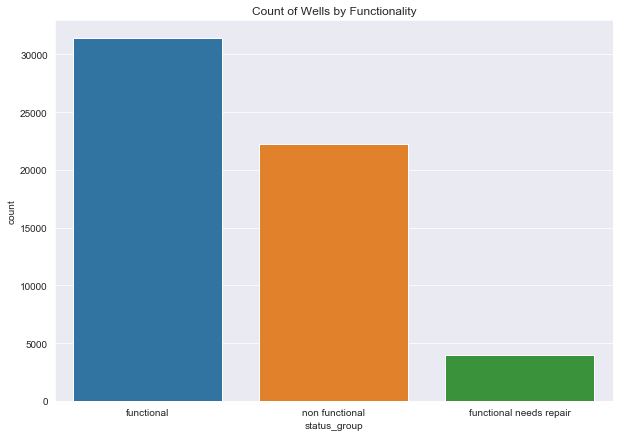

In [221]:
plt.figure(figsize=(10, 7))

sns.countplot(data=data,x='status_group')
plt.title('Count of Wells by Functionality');

Alright, about half of the water well pumps either don't work or need repair.

### Does location have anything to do with well functionality?
Besides, 'latitude' and 'longitude' there are 4 columns for location.

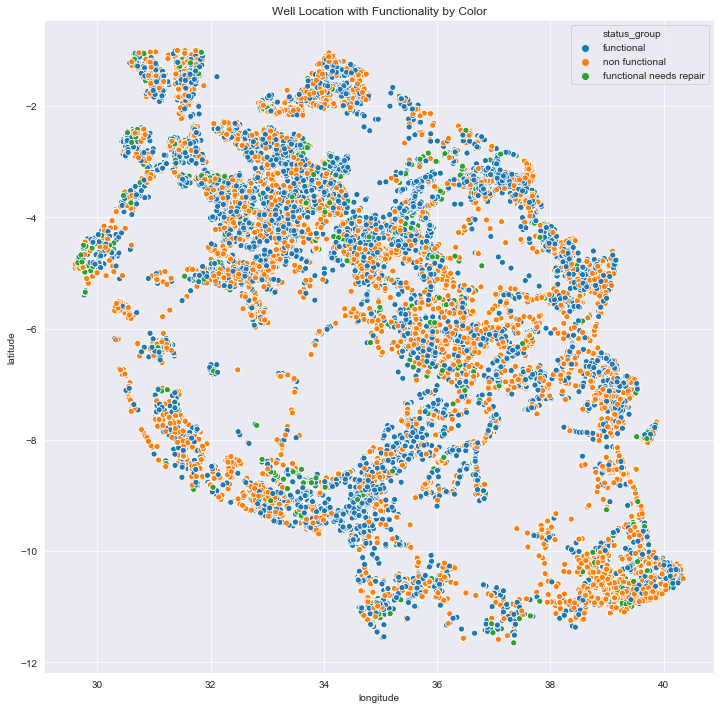

In [222]:
fig, ax = plt.subplots(figsize=(12,12))

sns.scatterplot(x='longitude', y='latitude', hue='status_group', data=eda_data, ax=ax)
plt.title('Well Location with Functionality by Color')
plt.legend(fancybox=True);

There seems to be a  cluster of more non-functional wells in the lower, south-east corner of Tanzania.

In [223]:
eda_data.groupby(['district_code', 'region', 'lga', 'ward']).size()[:20]

district_code  region         lga        ward       
0              Dodoma         Mpwapwa    Gode Gode       5
                                         Matomondo      18
1              Arusha         Monduli    Engaruka        7
                                         Engutoto        6
                                         Esilalei       63
                                         Lolkisale      10
                                         Makuyuni       42
                                         Moita           6
                                         Monduli Juu    12
                                         Selela         11
                                         Sepeko         32
               Dar es Salaam  Kinondoni  Bunju          26
                                         Goba           33
                                         Kibamba         9
                                         Kunduchi       18
                                         Mbezi           4
   

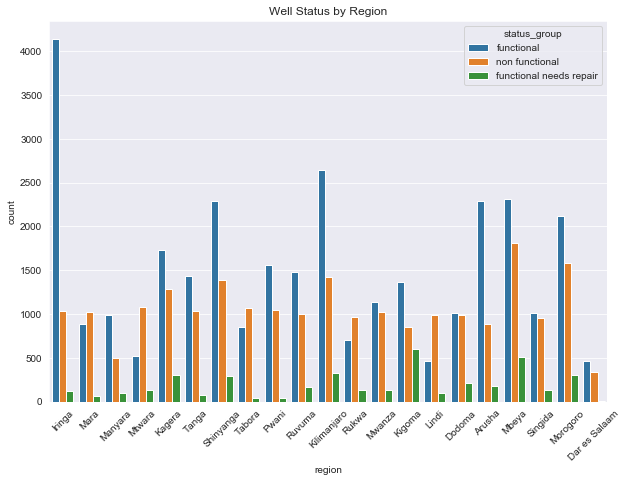

In [224]:
plt.figure(figsize=(10, 7))

sns.countplot(data=data,x='region',hue='status_group')
plt.title('Well Status by Region')
plt.xticks(rotation=45);

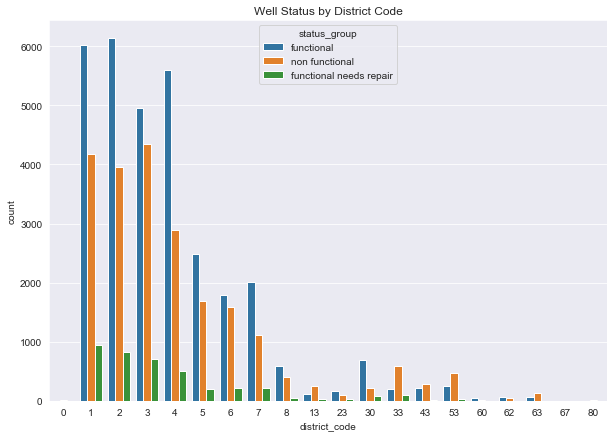

In [225]:
plt.figure(figsize=(10, 7))

sns.countplot(data=data,x='district_code',hue='status_group')
plt.title('Well Status by District Code');

For some of these higher district codes, like 13, 33, 43, 53, 63, & 80, more wells are non-functional than functional.

Still it is difficult to visualize if location plays a direct role in functionality. Perhaps we can drop these region columns for our model.

### Does water-quality have an effect on functionality?

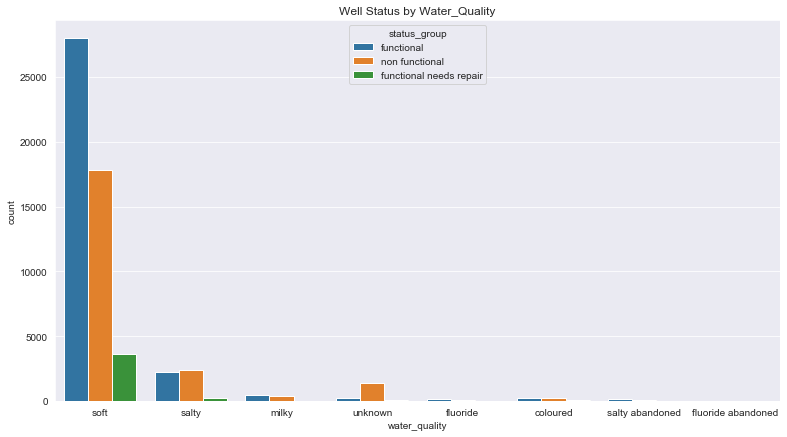

In [226]:
plt.figure(figsize=(13, 7))

sns.countplot(data=data,x='water_quality',hue='status_group')
plt.title('Well Status by Water_Quality');

Salty water wells are more likely to be non-functional! 'Unknown' water-quality is also usually non-functional. Perhaps this are wells that don't have any water coming out? Bigger takeawau though is that 90% or so of the wells are soft water.

### 'water_quantity' vs status

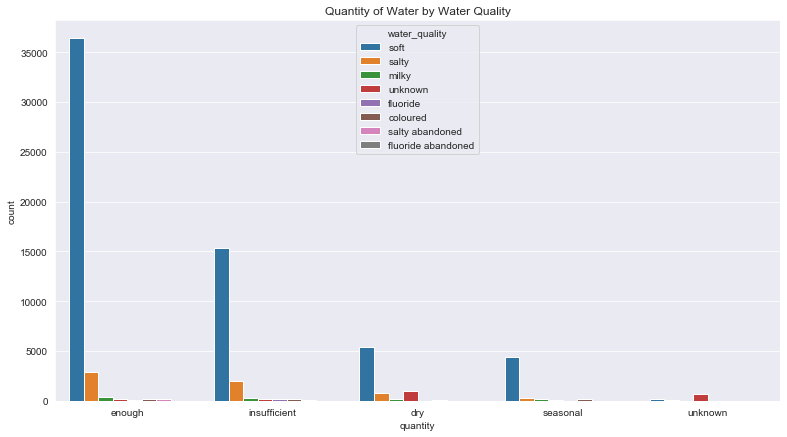

In [227]:
plt.figure(figsize=(13, 7))

sns.countplot(data=data,x='quantity',hue='water_quality')
plt.title('Quantity of Water by Water Quality');

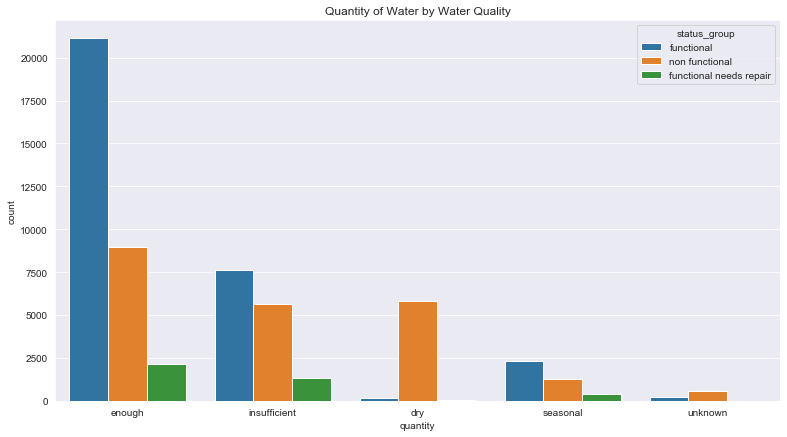

In [228]:
plt.figure(figsize=(13, 7))

sns.countplot(data=data,x='quantity',hue='status_group')
plt.title('Quantity of Water by Water Quality');

Dry well are almost always non_functional wells, with insufficient quantity highly non_functional as well. This tells us that functionality is closely tied to water quantity. 

### Population Points by Quantity and Status


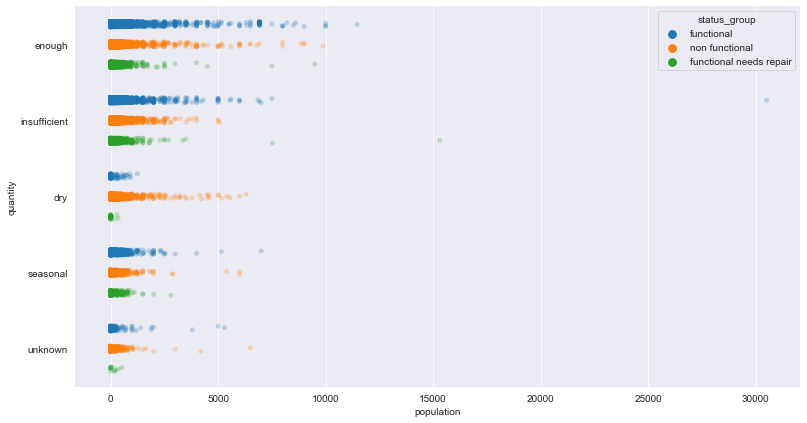

In [229]:
f, ax = plt.subplots(figsize=(13, 7))
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="population", y="quantity", hue="status_group",
              data=eda_data, dodge=True, alpha=.25, zorder=1);

We can see here that more dry wells are non-functional in higher-population areas. (Also, population extreme outlier alert! Let's try this again.)

In [230]:
from scipy import stats
eda_N_O = eda_data[(np.abs(stats.zscore(eda_data.population)) < 6)] #6 stds because the villages are very low-populated

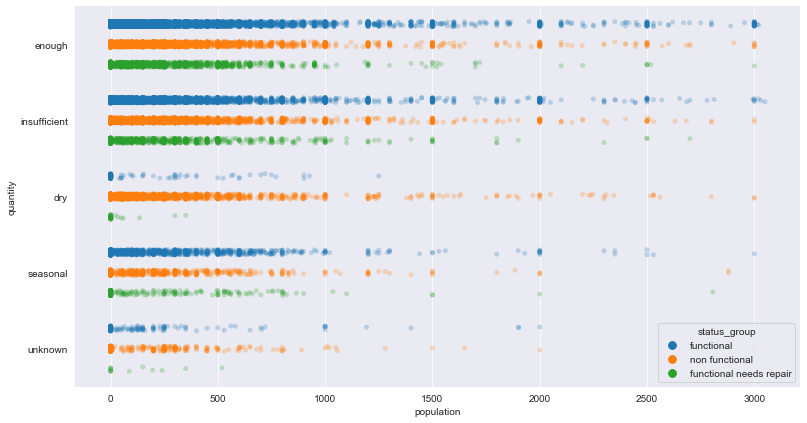

In [231]:
f, ax = plt.subplots(figsize=(13, 7))
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="population", y="quantity", hue="status_group",
              data=eda_N_O, dodge=True, alpha=.25, zorder=1);

Pretty much the same results as with the outliers. Only a noticeable correlation with non-functional dry wells in greater populations.

### 'installer' vs status

Let's see whether certain installers have failed at their jobs. Let's check the top 5 of installers who installed the most wells.

In [232]:
eda_data.installer.value_counts()[:5]

DWE           16255
unknown        3637
Government     1670
RWE            1181
Commu          1060
Name: installer, dtype: int64

In [233]:
top10 = eda_data.groupby("installer").filter(lambda x: len(x) >= 1060)

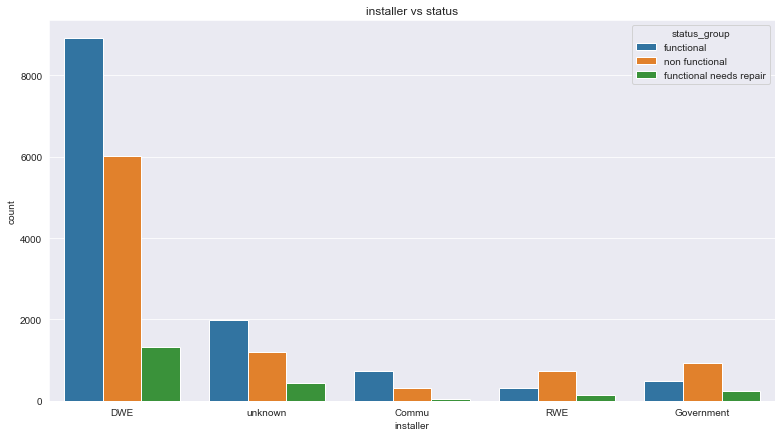

In [234]:
plt.figure(figsize=(13, 7))

sns.countplot(data=top10,x='installer',hue='status_group')
plt.title('installer vs status');

Hmm, it seems RWE and the Government installed wells, are prone to not functioning! 

### 'Extraction_type'

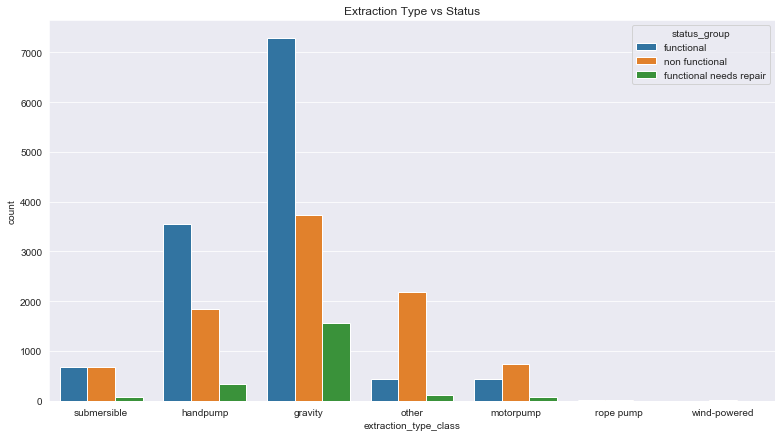

In [235]:
plt.figure(figsize=(13, 7))

sns.countplot(data=top10,x='extraction_type_class',hue='status_group')
plt.title('Extraction Type vs Status');

Nearly half of submersible water-wells don't work. Handpump wells and gravity wells mostly work. Motorpumps are mostly not working. Water wells that aren't any of these main types are prone to breaking as well it seems.

### Management vs Status 
#### 'scheme_management'

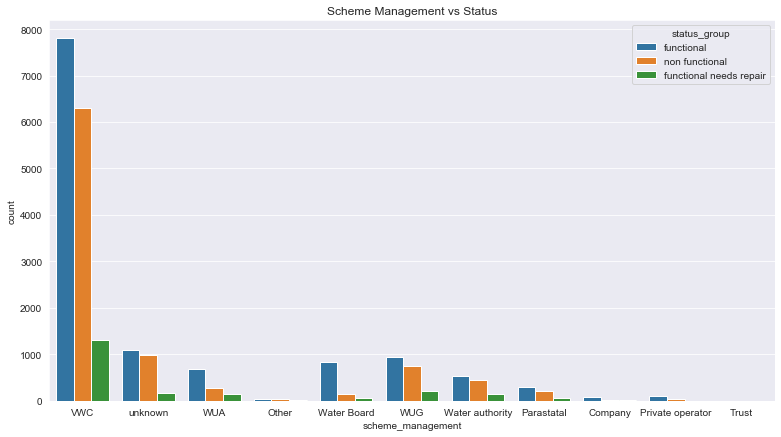

In [236]:
plt.figure(figsize=(13, 7))

sns.countplot(data=top10,x='scheme_management',hue='status_group')
plt.title('Scheme Management vs Status');

#### 'management'

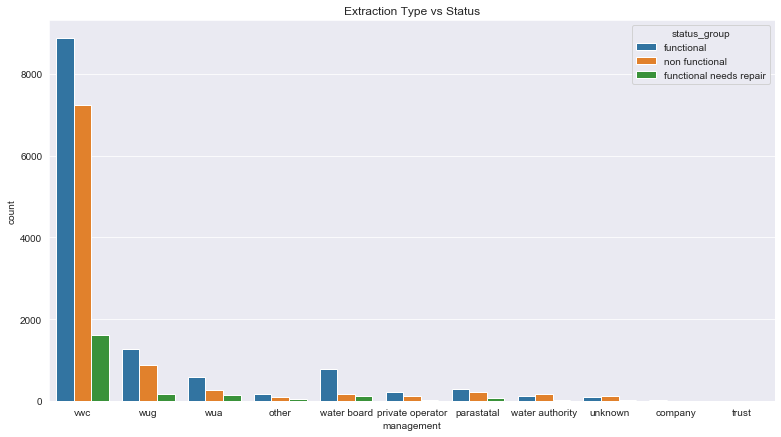

In [237]:
plt.figure(figsize=(13, 7))

sns.countplot(data=top10,x='management',hue='status_group')
plt.title('Extraction Type vs Status');

These both have nearly the same values. Let's drop 'scheme_management' from our original dataset.

In [238]:
data.drop(['scheme_management'], axis=1, inplace=True)

## Dealing with Categorical Variables
There are features that do not have continuous numbers for values, but rather object features with a high amount of unique categorical values (high cardinality) such as 'ward'. These object columns won't work in our ML models, so we will need to convert them to numerical values with binning and one-hot-encoding.

In [239]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71981 entries, 0 to 14849
Data columns (total 24 columns):
id                       71981 non-null int64
amount_tsh               71981 non-null float64
gps_height               71981 non-null int64
installer                71981 non-null object
longitude                71981 non-null float64
latitude                 71981 non-null float64
basin                    71981 non-null object
region                   71981 non-null object
district_code            71981 non-null int64
lga                      71981 non-null object
ward                     71981 non-null object
population               71981 non-null int64
public_meeting           71981 non-null bool
permit                   71981 non-null bool
extraction_type_class    71981 non-null object
management               71981 non-null object
payment_type             71981 non-null object
water_quality            71981 non-null object
quantity                 71981 non-null object
sou

In [240]:
data.ward.value_counts(normalize=True)

Igosi              0.005363
Imalinyi           0.004418
Siha Kati          0.004126
Mdandu             0.004057
Nduruma            0.003626
                     ...   
Kihangimahuka      0.000014
Uwanja wa Ndege    0.000014
Korongoni          0.000014
Mdabulo            0.000014
Gorong'a           0.000014
Name: ward, Length: 2039, dtype: float64

As 'ward' has is a region value such high cardinality, and we already have longitude and latitude, let's drop it.

In [241]:
data.drop(['ward'], axis=1, inplace=True)

In [242]:
data.nunique()

id                       71981
amount_tsh                 102
gps_height                2456
installer                 2370
longitude                71869
latitude                 71868
basin                        9
region                      21
district_code               20
lga                        124
population                1128
public_meeting               2
permit                       2
extraction_type_class        7
management                  12
payment_type                 7
water_quality                8
quantity                     5
source                      10
source_class                 3
waterpoint_type              7
status_group                 3
well_age                    60
dtype: int64

Let's make another copy of our data set to perform our feature engineering on, so we can go back to the original if we want to make any changes.

In [243]:
model_data = data.copy()

### One-hot-encode object/categorical columns 

#### 'installer'

In [244]:
model_data.installer.value_counts()[:5]

DWE           20310
unknown        4512
Government     2096
RWE            1467
Commu          1347
Name: installer, dtype: int64

Since there are 2358 unique installers, let's convert our low-count installers for an 'other'

In [245]:
valcountmap = model_data.copy()

In [246]:
def fix_high_card(df):
    cols = [i for i in df.columns if type(df[i].iloc[1]) == str]
    df[cols] = df[cols].where(df[cols].apply(lambda x: x.map(x.value_counts())) >= 1347, "unknown")
    return df.nunique()

In [247]:
fix_high_card(valcountmap)

id                       71981
amount_tsh                 102
gps_height                2456
installer                    5
longitude                71869
latitude                 71868
basin                        9
region                      21
district_code               20
lga                          6
population                1128
public_meeting               2
permit                       2
extraction_type_class        6
management                   7
payment_type                 6
water_quality                3
quantity                     5
source                       6
source_class                 3
waterpoint_type              5
status_group                 4
well_age                    60
dtype: int64

In [248]:
valcountmap.installer.value_counts()

unknown       46761
DWE           20310
Government     2096
RWE            1467
Commu          1347
Name: installer, dtype: int64

In [249]:
installer_dummies = pd.get_dummies(valcountmap.installer, prefix='installer')
model_data = model_data.drop(['installer'], axis=1)
model_data2 = pd.concat([model_data, installer_dummies], axis=1)
model_data2.head(5)

id  amount_tsh  gps_height  longitude   latitude  \
0  69572      6000.0        1390  34.938093  -9.856322   
1   8776         0.0        1399  34.698766  -2.147466   
2  34310        25.0         686  37.460664  -3.821329   
3  67743         0.0         263  38.486161 -11.155298   
4  19728         0.0           0  31.130847  -1.825359   

                     basin   region  district_code        lga  population  \
0               Lake Nyasa   Iringa              5     Ludewa         109   
1            Lake Victoria     Mara              2  Serengeti         280   
2                  Pangani  Manyara              4  Simanjiro         250   
3  Ruvuma / Southern Coast   Mtwara             63   Nanyumbu          58   
4            Lake Victoria   Kagera              1    Karagwe           0   

   public_meeting  permit extraction_type_class management payment_type  \
0            True   False               gravity        vwc     annually   
1            True    True               gravity        wug    never pay   
2            True    True               gravity        vwc   per bucket   
3            True    True           submersible        vwc    never pay   
4            True    True               gravity      other    never pay   

  water_quality      quantity                source source_class  \
0          soft        enough                spring  groundwater   
1          soft  insufficient  rainwater harvesting      surface   
2          soft        enough                   dam      surface   
3          soft           dry           machine dbh  groundwater   
4          soft      seasonal  rainwater harvesting      surface   

               waterpoint_type    status_group  well_age  installer_Commu  \
0           communal standpipe      functional        12                0   
1           communal standpipe      functional         3                0   
2  communal standpipe multiple      functional         4                0   
3  communal standpipe multiple  non functional        27                0   
4           communal standpipe      functional        11                0   

   installer_DWE  installer_Government  installer_RWE  installer_unknown  
0              0                     0              0                  1  
1              0                     0              0                  1  
2              0                     0              0                  1  
3              0                     0              0                  1  
4              0                     0              0                  1

#### 'basin'

In [250]:
model_data2.basin.value_counts()

Pangani                    11143
Lake Victoria              10726
Rufiji                      9987
Internal                    9642
Lake Tanganyika             7928
Wami / Ruvu                 7577
Lake Nyasa                  6332
Ruvuma / Southern Coast     5587
Lake Rukwa                  3059
Name: basin, dtype: int64

In [251]:
model_data2.nunique()

id                       71981
amount_tsh                 102
gps_height                2456
longitude                71869
latitude                 71868
basin                        9
region                      21
district_code               20
lga                        124
population                1128
public_meeting               2
permit                       2
extraction_type_class        7
management                  12
payment_type                 7
water_quality                8
quantity                     5
source                      10
source_class                 3
waterpoint_type              7
status_group                 3
well_age                    60
installer_Commu              2
installer_DWE                2
installer_Government         2
installer_RWE                2
installer_unknown            2
dtype: int64

In [252]:
def fix_lower_card(df):
    cols = [i for i in df.columns if type(df[i].iloc[1]) == str]
    df[cols] = df[cols].where(df[cols].apply(lambda x: x.map(x.value_counts())) >= 7928, "other")
    return df.nunique()

In [253]:
valcountmap2 = model_data.copy()
fix_lower_card(valcountmap2)

id                       71981
amount_tsh                 102
gps_height                2456
longitude                71869
latitude                 71868
basin                        6
region                       1
district_code               20
lga                          1
population                1128
public_meeting               2
permit                       2
extraction_type_class        3
management                   2
payment_type                 5
water_quality                2
quantity                     3
source                       5
source_class                 3
waterpoint_type              3
status_group                 3
well_age                    60
dtype: int64

In [254]:
valcountmap2.basin.value_counts()

other              22555
Pangani            11143
Lake Victoria      10726
Rufiji              9987
Internal            9642
Lake Tanganyika     7928
Name: basin, dtype: int64

In [255]:
valcountmap2 = pd.get_dummies(valcountmap2.basin, prefix='basin')
model_data2 = model_data2.drop(['basin'], axis=1)
model_data3 = pd.concat([model_data2, valcountmap2], axis=1)
model_data3.head(5)

id  amount_tsh  gps_height  longitude   latitude   region  \
0  69572      6000.0        1390  34.938093  -9.856322   Iringa   
1   8776         0.0        1399  34.698766  -2.147466     Mara   
2  34310        25.0         686  37.460664  -3.821329  Manyara   
3  67743         0.0         263  38.486161 -11.155298   Mtwara   
4  19728         0.0           0  31.130847  -1.825359   Kagera   

   district_code        lga  population  public_meeting  permit  \
0              5     Ludewa         109            True   False   
1              2  Serengeti         280            True    True   
2              4  Simanjiro         250            True    True   
3             63   Nanyumbu          58            True    True   
4              1    Karagwe           0            True    True   

  extraction_type_class management payment_type water_quality      quantity  \
0               gravity        vwc     annually          soft        enough   
1               gravity        wug    never pay          soft  insufficient   
2               gravity        vwc   per bucket          soft        enough   
3           submersible        vwc    never pay          soft           dry   
4               gravity      other    never pay          soft      seasonal   

                 source source_class              waterpoint_type  \
0                spring  groundwater           communal standpipe   
1  rainwater harvesting      surface           communal standpipe   
2                   dam      surface  communal standpipe multiple   
3           machine dbh  groundwater  communal standpipe multiple   
4  rainwater harvesting      surface           communal standpipe   

     status_group  well_age  installer_Commu  installer_DWE  \
0      functional        12                0              0   
1      functional         3                0              0   
2      functional         4                0              0   
3  non functional        27                0              0   
4      functional        11                0              0   

   installer_Government  installer_RWE  installer_unknown  basin_Internal  \
0                     0              0                  1               0   
1                     0              0                  1               0   
2                     0              0                  1               0   
3                     0              0                  1               0   
4                     0              0                  1               0   

   basin_Lake Tanganyika  basin_Lake Victoria  basin_Pangani  basin_Rufiji  \
0                      0                    0              0             0   
1                      0                    1              0             0   
2                      0                    0              1             0   
3                      0                    0              0             0   
4                      0                    1              0             0   

   basin_other  
0            1  
1            0  
2            0  
3            1  
4            0

#### 'region'

In [256]:
def fix_low_card(df):
    cols = [i for i in df.columns if type(df[i].iloc[1]) == str]
    df[cols] = df[cols].where(df[cols].apply(lambda x: x.map(x.value_counts())) >= 5034, "other")
    return df.nunique()

In [257]:
valcountmap3 = model_data.copy()
fix_low_card(valcountmap3)

id                       71981
amount_tsh                 102
gps_height                2456
longitude                71869
latitude                 71868
basin                        9
region                       6
district_code               20
lga                          1
population                1128
public_meeting               2
permit                       2
extraction_type_class        4
management                   3
payment_type                 5
water_quality                3
quantity                     4
source                       5
source_class                 3
waterpoint_type              4
status_group                 3
well_age                    60
dtype: int64

In [258]:
valcountmap3 = pd.get_dummies(valcountmap3.region, prefix='region')
model_data3 = model_data3.drop(['region'], axis=1)
model_data4 = pd.concat([model_data3, valcountmap3], axis=1)
model_data4.head(5)

id  amount_tsh  gps_height  longitude   latitude  district_code  \
0  69572      6000.0        1390  34.938093  -9.856322              5   
1   8776         0.0        1399  34.698766  -2.147466              2   
2  34310        25.0         686  37.460664  -3.821329              4   
3  67743         0.0         263  38.486161 -11.155298             63   
4  19728         0.0           0  31.130847  -1.825359              1   

         lga  population  public_meeting  permit extraction_type_class  \
0     Ludewa         109            True   False               gravity   
1  Serengeti         280            True    True               gravity   
2  Simanjiro         250            True    True               gravity   
3   Nanyumbu          58            True    True           submersible   
4    Karagwe           0            True    True               gravity   

  management payment_type water_quality      quantity                source  \
0        vwc     annually          soft        enough                spring   
1        wug    never pay          soft  insufficient  rainwater harvesting   
2        vwc   per bucket          soft        enough                   dam   
3        vwc    never pay          soft           dry           machine dbh   
4      other    never pay          soft      seasonal  rainwater harvesting   

  source_class              waterpoint_type    status_group  well_age  \
0  groundwater           communal standpipe      functional        12   
1      surface           communal standpipe      functional         3   
2      surface  communal standpipe multiple      functional         4   
3  groundwater  communal standpipe multiple  non functional        27   
4      surface           communal standpipe      functional        11   

   installer_Commu  installer_DWE  installer_Government  installer_RWE  \
0                0              0                     0              0   
1                0              0                     0              0   
2                0              0                     0              0   
3                0              0                     0              0   
4                0              0                     0              0   

   installer_unknown  basin_Internal  basin_Lake Tanganyika  \
0                  1               0                      0   
1                  1               0                      0   
2                  1               0                      0   
3                  1               0                      0   
4                  1               0                      0   

   basin_Lake Victoria  basin_Pangani  basin_Rufiji  basin_other  \
0                    0              0             0            1   
1                    1              0             0            0   
2                    0              1             0            0   
3                    0              0             0            1   
4                    1              0             0            0   

   region_Iringa  region_Kilimanjaro  region_Mbeya  region_Morogoro  \
0              1                   0             0                0   
1              0                   0             0                0   
2              0                   0             0                0   
3              0                   0             0                0   
4              0                   0             0                0   

   region_Shinyanga  region_other  
0                 0             0  
1                 0             1  
2                 0             1  
3                 0             1  
4                 0             1

#### 'lga' & rest

In [259]:
model_data4.lga.value_counts()

Njombe          3128
Moshi Rural     1566
Arusha Rural    1521
Rungwe          1381
Kilosa          1368
                ... 
Songea Urban     103
Kigoma Urban      95
Arusha Urban      82
Lindi Urban       24
Nyamagana          2
Name: lga, Length: 124, dtype: int64

'lga' is another region variable with high cardinality. As we already have region variables, and they don't seem to be good indicators of functionality, let's drop it.

In [260]:
model_data4.drop(['lga'], axis=1, inplace=True)

In [261]:
def fix_card(df):
    cols = [i for i in df.columns if type(df[i].iloc[1]) == str]
    df[cols] = df[cols].where(df[cols].apply(lambda x: x.map(x.value_counts())) >= 1381, "other")
    return df.nunique()

In [262]:
valcountmap4 = model_data.copy()
fix_card(valcountmap4)

id                       71981
amount_tsh                 102
gps_height                2456
longitude                71869
latitude                 71868
basin                        9
region                      21
district_code               20
lga                          5
population                1128
public_meeting               2
permit                       2
extraction_type_class        5
management                   7
payment_type                 7
water_quality                4
quantity                     5
source                       6
source_class                 3
waterpoint_type              4
status_group                 4
well_age                    60
dtype: int64

This effectively worked the remainder of our high cardinality object columns, so we will one-hot-encode the rest from here.

##### 'extraction_type_class'

In [263]:
valcountmap6 = pd.get_dummies(valcountmap4.extraction_type_class, prefix='xtrctn_cl')
model_data5 = model_data4.drop(['extraction_type_class'], axis=1)
model_data6 = pd.concat([model_data5, valcountmap6], axis=1)
model_data6.head(5)

id  amount_tsh  gps_height  longitude   latitude  district_code  \
0  69572      6000.0        1390  34.938093  -9.856322              5   
1   8776         0.0        1399  34.698766  -2.147466              2   
2  34310        25.0         686  37.460664  -3.821329              4   
3  67743         0.0         263  38.486161 -11.155298             63   
4  19728         0.0           0  31.130847  -1.825359              1   

   population  public_meeting  permit management payment_type water_quality  \
0         109            True   False        vwc     annually          soft   
1         280            True    True        wug    never pay          soft   
2         250            True    True        vwc   per bucket          soft   
3          58            True    True        vwc    never pay          soft   
4           0            True    True      other    never pay          soft   

       quantity                source source_class  \
0        enough                spring  groundwater   
1  insufficient  rainwater harvesting      surface   
2        enough                   dam      surface   
3           dry           machine dbh  groundwater   
4      seasonal  rainwater harvesting      surface   

               waterpoint_type    status_group  well_age  installer_Commu  \
0           communal standpipe      functional        12                0   
1           communal standpipe      functional         3                0   
2  communal standpipe multiple      functional         4                0   
3  communal standpipe multiple  non functional        27                0   
4           communal standpipe      functional        11                0   

   installer_DWE  installer_Government  installer_RWE  installer_unknown  \
0              0                     0              0                  1   
1              0                     0              0                  1   
2              0                     0              0                  1   
3              0                     0              0                  1   
4              0                     0              0                  1   

   basin_Internal  basin_Lake Tanganyika  basin_Lake Victoria  basin_Pangani  \
0               0                      0                    0              0   
1               0                      0                    1              0   
2               0                      0                    0              1   
3               0                      0                    0              0   
4               0                      0                    1              0   

   basin_Rufiji  basin_other  region_Iringa  region_Kilimanjaro  region_Mbeya  \
0             0            1              1                   0             0   
1             0            0              0                   0             0   
2             0            0              0                   0             0   
3             0            1              0                   0             0   
4             0            0              0                   0             0   

   region_Morogoro  region_Shinyanga  region_other  xtrctn_cl_gravity  \
0                0                 0             0                  1   
1                0                 0             1                  1   
2                0                 0             1                  1   
3                0                 0             1                  0   
4                0                 0             1                  1   

   xtrctn_cl_handpump  xtrctn_cl_motorpump  xtrctn_cl_other  \
0                   0                    0                0   
1                   0                    0                0   
2                   0                    0                0   
3                   0                    0                0   
4                   0                    0                0   

   xtrctn_cl_submersible  
0                      0  
1      

##### 'management'

In [264]:
valcountmap7 = pd.get_dummies(valcountmap4.management, prefix='mgmt')
model_data6 = model_data6.drop(['management'], axis=1)
model_data7 = pd.concat([model_data6, valcountmap7], axis=1)
model_data7.head(5)

id  amount_tsh  gps_height  longitude   latitude  district_code  \
0  69572      6000.0        1390  34.938093  -9.856322              5   
1   8776         0.0        1399  34.698766  -2.147466              2   
2  34310        25.0         686  37.460664  -3.821329              4   
3  67743         0.0         263  38.486161 -11.155298             63   
4  19728         0.0           0  31.130847  -1.825359              1   

   population  public_meeting  permit payment_type water_quality  \
0         109            True   False     annually          soft   
1         280            True    True    never pay          soft   
2         250            True    True   per bucket          soft   
3          58            True    True    never pay          soft   
4           0            True    True    never pay          soft   

       quantity                source source_class  \
0        enough                spring  groundwater   
1  insufficient  rainwater harvesting      surface   
2        enough                   dam      surface   
3           dry           machine dbh  groundwater   
4      seasonal  rainwater harvesting      surface   

               waterpoint_type    status_group  well_age  installer_Commu  \
0           communal standpipe      functional        12                0   
1           communal standpipe      functional         3                0   
2  communal standpipe multiple      functional         4                0   
3  communal standpipe multiple  non functional        27                0   
4           communal standpipe      functional        11                0   

   installer_DWE  installer_Government  installer_RWE  installer_unknown  \
0              0                     0              0                  1   
1              0                     0              0                  1   
2              0                     0              0                  1   
3              0                     0              0                  1   
4              0                     0              0                  1   

   basin_Internal  basin_Lake Tanganyika  basin_Lake Victoria  basin_Pangani  \
0               0                      0                    0              0   
1               0                      0                    1              0   
2               0                      0                    0              1   
3               0                      0                    0              0   
4               0                      0                    1              0   

   basin_Rufiji  basin_other  region_Iringa  region_Kilimanjaro  region_Mbeya  \
0             0            1              1                   0             0   
1             0            0              0                   0             0   
2             0            0              0                   0             0   
3             0            1              0                   0             0   
4             0            0              0                   0             0   

   region_Morogoro  region_Shinyanga  region_other  xtrctn_cl_gravity  \
0                0                 0             0                  1   
1                0                 0             1                  1   
2                0                 0             1                  1   
3                0                 0             1                  0   
4                0                 0             1                  1   

   xtrctn_cl_handpump  xtrctn_cl_motorpump  xtrctn_cl_other  \
0                   0                    0                0   
1                   0                    0                0   
2                   0                    0                0   
3                   0                    0                0   
4                   0                    0                0   

   xtrctn_cl_submersible  mgmt_other  mgmt_parastatal  mgmt_private operator  \
0                      0           0           

##### 'payment_type'

In [265]:
valcountmap8 = pd.get_dummies(valcountmap4.payment_type, prefix='pay_type')
model_data7 = model_data7.drop(['payment_type'], axis=1)
model_data8 = pd.concat([model_data7, valcountmap8], axis=1)
model_data8.head(5)

id  amount_tsh  gps_height  longitude   latitude  district_code  \
0  69572      6000.0        1390  34.938093  -9.856322              5   
1   8776         0.0        1399  34.698766  -2.147466              2   
2  34310        25.0         686  37.460664  -3.821329              4   
3  67743         0.0         263  38.486161 -11.155298             63   
4  19728         0.0           0  31.130847  -1.825359              1   

   population  public_meeting  permit water_quality      quantity  \
0         109            True   False          soft        enough   
1         280            True    True          soft  insufficient   
2         250            True    True          soft        enough   
3          58            True    True          soft           dry   
4           0            True    True          soft      seasonal   

                 source source_class              waterpoint_type  \
0                spring  groundwater           communal standpipe   
1  rainwater harvesting      surface           communal standpipe   
2                   dam      surface  communal standpipe multiple   
3           machine dbh  groundwater  communal standpipe multiple   
4  rainwater harvesting      surface           communal standpipe   

     status_group  well_age  installer_Commu  installer_DWE  \
0      functional        12                0              0   
1      functional         3                0              0   
2      functional         4                0              0   
3  non functional        27                0              0   
4      functional        11                0              0   

   installer_Government  installer_RWE  installer_unknown  basin_Internal  \
0                     0              0                  1               0   
1                     0              0                  1               0   
2                     0              0                  1               0   
3                     0              0                  1               0   
4                     0              0                  1               0   

   basin_Lake Tanganyika  basin_Lake Victoria  basin_Pangani  basin_Rufiji  \
0                      0                    0              0             0   
1                      0                    1              0             0   
2                      0                    0              1             0   
3                      0                    0              0             0   
4                      0                    1              0             0   

   basin_other  region_Iringa  region_Kilimanjaro  region_Mbeya  \
0            1              1                   0             0   
1            0              0                   0             0   
2            0              0                   0             0   
3            1              0                   0             0   
4            0              0                   0             0   

   region_Morogoro  region_Shinyanga  region_other  xtrctn_cl_gravity  \
0                0                 0             0                  1   
1                0                 0             1                  1   
2                0                 0             1                  1   
3                0                 0             1                  0   
4                0                 0             1                  1   

   xtrctn_cl_handpump  xtrctn_cl_motorpump  xtrctn_cl_other  \
0                   0                    0                0   
1                   0                    0                0   
2                   0                    0                0   
3                   0                    0                0   
4                   0                    0                0   

   xtrctn_cl_submersible  mgmt_other  mgmt_parastatal  mgmt_private operator  \
0                      0           0                0                      0   
1                      0           0         

##### water_quality

In [266]:
valcountmap9 = pd.get_dummies(valcountmap4.water_quality, prefix='water_qual')
model_data8 = model_data8.drop(['water_quality'], axis=1)
model_data9 = pd.concat([model_data8, valcountmap9], axis=1)
model_data9.head(5)

id  amount_tsh  gps_height  longitude   latitude  district_code  \
0  69572      6000.0        1390  34.938093  -9.856322              5   
1   8776         0.0        1399  34.698766  -2.147466              2   
2  34310        25.0         686  37.460664  -3.821329              4   
3  67743         0.0         263  38.486161 -11.155298             63   
4  19728         0.0           0  31.130847  -1.825359              1   

   population  public_meeting  permit      quantity                source  \
0         109            True   False        enough                spring   
1         280            True    True  insufficient  rainwater harvesting   
2         250            True    True        enough                   dam   
3          58            True    True           dry           machine dbh   
4           0            True    True      seasonal  rainwater harvesting   

  source_class              waterpoint_type    status_group  well_age  \
0  groundwater           communal standpipe      functional        12   
1      surface           communal standpipe      functional         3   
2      surface  communal standpipe multiple      functional         4   
3  groundwater  communal standpipe multiple  non functional        27   
4      surface           communal standpipe      functional        11   

   installer_Commu  installer_DWE  installer_Government  installer_RWE  \
0                0              0                     0              0   
1                0              0                     0              0   
2                0              0                     0              0   
3                0              0                     0              0   
4                0              0                     0              0   

   installer_unknown  basin_Internal  basin_Lake Tanganyika  \
0                  1               0                      0   
1                  1               0                      0   
2                  1               0                      0   
3                  1               0                      0   
4                  1               0                      0   

   basin_Lake Victoria  basin_Pangani  basin_Rufiji  basin_other  \
0                    0              0             0            1   
1                    1              0             0            0   
2                    0              1             0            0   
3                    0              0             0            1   
4                    1              0             0            0   

   region_Iringa  region_Kilimanjaro  region_Mbeya  region_Morogoro  \
0              1                   0             0                0   
1              0                   0             0                0   
2              0                   0             0                0   
3              0                   0             0                0   
4              0                   0             0                0   

   region_Shinyanga  region_other  xtrctn_cl_gravity  xtrctn_cl_handpump  \
0                 0             0                  1                   0   
1                 0             1                  1                   0   
2                 0             1                  1                   0   
3                 0             1                  0                   0   
4                 0             1                  1                   0   

   xtrctn_cl_motorpump  xtrctn_cl_other  xtrctn_cl_submersible  mgmt_other  \
0                    0                0                      0           0   
1                    0                0                      0           0   
2                    0                0                      0           0   
3                    0                0                      1           0   
4                    0                0                      0           1   

   mgmt_parastatal  mgmt_private operator  mgmt_vwc  mgmt_water board  \
0     

##### quantity

In [267]:
valcountmap10 = pd.get_dummies(valcountmap4.quantity, prefix='quantity')
model_data9 = model_data9.drop(['quantity'], axis=1)
model_data10 = pd.concat([model_data9, valcountmap10], axis=1)
model_data10.head(5)

id  amount_tsh  gps_height  longitude   latitude  district_code  \
0  69572      6000.0        1390  34.938093  -9.856322              5   
1   8776         0.0        1399  34.698766  -2.147466              2   
2  34310        25.0         686  37.460664  -3.821329              4   
3  67743         0.0         263  38.486161 -11.155298             63   
4  19728         0.0           0  31.130847  -1.825359              1   

   population  public_meeting  permit                source source_class  \
0         109            True   False                spring  groundwater   
1         280            True    True  rainwater harvesting      surface   
2         250            True    True                   dam      surface   
3          58            True    True           machine dbh  groundwater   
4           0            True    True  rainwater harvesting      surface   

               waterpoint_type    status_group  well_age  installer_Commu  \
0           communal standpipe      functional        12                0   
1           communal standpipe      functional         3                0   
2  communal standpipe multiple      functional         4                0   
3  communal standpipe multiple  non functional        27                0   
4           communal standpipe      functional        11                0   

   installer_DWE  installer_Government  installer_RWE  installer_unknown  \
0              0                     0              0                  1   
1              0                     0              0                  1   
2              0                     0              0                  1   
3              0                     0              0                  1   
4              0                     0              0                  1   

   basin_Internal  basin_Lake Tanganyika  basin_Lake Victoria  basin_Pangani  \
0               0                      0                    0              0   
1               0                      0                    1              0   
2               0                      0                    0              1   
3               0                      0                    0              0   
4               0                      0                    1              0   

   basin_Rufiji  basin_other  region_Iringa  region_Kilimanjaro  region_Mbeya  \
0             0            1              1                   0             0   
1             0            0              0                   0             0   
2             0            0              0                   0             0   
3             0            1              0                   0             0   
4             0            0              0                   0             0   

   region_Morogoro  region_Shinyanga  region_other  xtrctn_cl_gravity  \
0                0                 0             0                  1   
1                0                 0             1                  1   
2                0                 0             1                  1   
3                0                 0             1                  0   
4                0                 0             1                  1   

   xtrctn_cl_handpump  xtrctn_cl_motorpump  xtrctn_cl_other  \
0                   0                    0                0   
1                   0                    0                0   
2                   0                    0                0   
3                   0                    0                0   
4                   0                    0                0   

   xtrctn_cl_submersible  mgmt_other  mgmt_parastatal  mgmt_private operator  \
0                      0           0                0                      0   
1                      0           0                0                      0   
2                      0           0                0                      0   
3                      1           0                0                      0   
4   

##### source

In [268]:
valcountmap11 = pd.get_dummies(valcountmap4.source, prefix='source')
model_data10 = model_data10.drop(['source'], axis=1)
model_data11 = pd.concat([model_data10, valcountmap11], axis=1)
model_data11.head(5)

id  amount_tsh  gps_height  longitude   latitude  district_code  \
0  69572      6000.0        1390  34.938093  -9.856322              5   
1   8776         0.0        1399  34.698766  -2.147466              2   
2  34310        25.0         686  37.460664  -3.821329              4   
3  67743         0.0         263  38.486161 -11.155298             63   
4  19728         0.0           0  31.130847  -1.825359              1   

   population  public_meeting  permit source_class  \
0         109            True   False  groundwater   
1         280            True    True      surface   
2         250            True    True      surface   
3          58            True    True  groundwater   
4           0            True    True      surface   

               waterpoint_type    status_group  well_age  installer_Commu  \
0           communal standpipe      functional        12                0   
1           communal standpipe      functional         3                0   
2  communal standpipe multiple      functional         4                0   
3  communal standpipe multiple  non functional        27                0   
4           communal standpipe      functional        11                0   

   installer_DWE  installer_Government  installer_RWE  installer_unknown  \
0              0                     0              0                  1   
1              0                     0              0                  1   
2              0                     0              0                  1   
3              0                     0              0                  1   
4              0                     0              0                  1   

   basin_Internal  basin_Lake Tanganyika  basin_Lake Victoria  basin_Pangani  \
0               0                      0                    0              0   
1               0                      0                    1              0   
2               0                      0                    0              1   
3               0                      0                    0              0   
4               0                      0                    1              0   

   basin_Rufiji  basin_other  region_Iringa  region_Kilimanjaro  region_Mbeya  \
0             0            1              1                   0             0   
1             0            0              0                   0             0   
2             0            0              0                   0             0   
3             0            1              0                   0             0   
4             0            0              0                   0             0   

   region_Morogoro  region_Shinyanga  region_other  xtrctn_cl_gravity  \
0                0                 0             0                  1   
1                0                 0             1                  1   
2                0                 0             1                  1   
3                0                 0             1                  0   
4                0                 0             1                  1   

   xtrctn_cl_handpump  xtrctn_cl_motorpump  xtrctn_cl_other  \
0                   0                    0                0   
1                   0                    0                0   
2                   0                    0                0   
3                   0                    0                0   
4                   0                    0                0   

   xtrctn_cl_submersible  mgmt_other  mgmt_parastatal  mgmt_private operator  \
0                      0           0                0                      0   
1                      0           0                0                      0   
2                      0           0                0                      0   
3                      1           0                0                      0   
4                      0           1                0                      0   

   mgmt_vwc  mgmt_water board  mgmt_wua  mgmt_wug  pay_

##### source_class

In [269]:
valcountmap12 = pd.get_dummies(valcountmap4.source_class, prefix='source_cl')
model_data11 = model_data11.drop(['source_class'], axis=1)
model_data12 = pd.concat([model_data11, valcountmap12], axis=1)
model_data12.head(5)

id  amount_tsh  gps_height  longitude   latitude  district_code  \
0  69572      6000.0        1390  34.938093  -9.856322              5   
1   8776         0.0        1399  34.698766  -2.147466              2   
2  34310        25.0         686  37.460664  -3.821329              4   
3  67743         0.0         263  38.486161 -11.155298             63   
4  19728         0.0           0  31.130847  -1.825359              1   

   population  public_meeting  permit              waterpoint_type  \
0         109            True   False           communal standpipe   
1         280            True    True           communal standpipe   
2         250            True    True  communal standpipe multiple   
3          58            True    True  communal standpipe multiple   
4           0            True    True           communal standpipe   

     status_group  well_age  installer_Commu  installer_DWE  \
0      functional        12                0              0   
1      functional         3                0              0   
2      functional         4                0              0   
3  non functional        27                0              0   
4      functional        11                0              0   

   installer_Government  installer_RWE  installer_unknown  basin_Internal  \
0                     0              0                  1               0   
1                     0              0                  1               0   
2                     0              0                  1               0   
3                     0              0                  1               0   
4                     0              0                  1               0   

   basin_Lake Tanganyika  basin_Lake Victoria  basin_Pangani  basin_Rufiji  \
0                      0                    0              0             0   
1                      0                    1              0             0   
2                      0                    0              1             0   
3                      0                    0              0             0   
4                      0                    1              0             0   

   basin_other  region_Iringa  region_Kilimanjaro  region_Mbeya  \
0            1              1                   0             0   
1            0              0                   0             0   
2            0              0                   0             0   
3            1              0                   0             0   
4            0              0                   0             0   

   region_Morogoro  region_Shinyanga  region_other  xtrctn_cl_gravity  \
0                0                 0             0                  1   
1                0                 0             1                  1   
2                0                 0             1                  1   
3                0                 0             1                  0   
4                0                 0             1                  1   

   xtrctn_cl_handpump  xtrctn_cl_motorpump  xtrctn_cl_other  \
0                   0                    0                0   
1                   0                    0                0   
2                   0                    0                0   
3                   0                    0                0   
4                   0                    0                0   

   xtrctn_cl_submersible  mgmt_other  mgmt_parastatal  mgmt_private operator  \
0                      0           0                0                      0   
1                      0           0                0                      0   
2                      0           0                0                      0   
3                      1           0                0                      0   
4                      0           1                0                      0   

   mgmt_vwc  mgmt_water board  mgmt_wua  mgmt_wug  pay_type_annually  \
0         1                 0         0         0            

##### waterpoint_type

In [270]:
valcountmap13 = pd.get_dummies(valcountmap4.waterpoint_type, prefix='waterpt_type')
model_data12 = model_data12.drop(['waterpoint_type'], axis=1)
model_data13 = pd.concat([model_data12, valcountmap13], axis=1)
model_data13.head(5)

id  amount_tsh  gps_height  longitude   latitude  district_code  \
0  69572      6000.0        1390  34.938093  -9.856322              5   
1   8776         0.0        1399  34.698766  -2.147466              2   
2  34310        25.0         686  37.460664  -3.821329              4   
3  67743         0.0         263  38.486161 -11.155298             63   
4  19728         0.0           0  31.130847  -1.825359              1   

   population  public_meeting  permit    status_group  well_age  \
0         109            True   False      functional        12   
1         280            True    True      functional         3   
2         250            True    True      functional         4   
3          58            True    True  non functional        27   
4           0            True    True      functional        11   

   installer_Commu  installer_DWE  installer_Government  installer_RWE  \
0                0              0                     0              0   
1                0              0                     0              0   
2                0              0                     0              0   
3                0              0                     0              0   
4                0              0                     0              0   

   installer_unknown  basin_Internal  basin_Lake Tanganyika  \
0                  1               0                      0   
1                  1               0                      0   
2                  1               0                      0   
3                  1               0                      0   
4                  1               0                      0   

   basin_Lake Victoria  basin_Pangani  basin_Rufiji  basin_other  \
0                    0              0             0            1   
1                    1              0             0            0   
2                    0              1             0            0   
3                    0              0             0            1   
4                    1              0             0            0   

   region_Iringa  region_Kilimanjaro  region_Mbeya  region_Morogoro  \
0              1                   0             0                0   
1              0                   0             0                0   
2              0                   0             0                0   
3              0                   0             0                0   
4              0                   0             0                0   

   region_Shinyanga  region_other  xtrctn_cl_gravity  xtrctn_cl_handpump  \
0                 0             0                  1                   0   
1                 0             1                  1                   0   
2                 0             1                  1                   0   
3                 0             1                  0                   0   
4                 0             1                  1                   0   

   xtrctn_cl_motorpump  xtrctn_cl_other  xtrctn_cl_submersible  mgmt_other  \
0                    0                0                      0           0   
1                    0                0                      0           0   
2                    0                0                      0           0   
3                    0                0                      1           0   
4                    0                0                      0           1   

   mgmt_parastatal  mgmt_private operator  mgmt_vwc  mgmt_water board  \
0                0                      0         1                 0   
1                0                      0         0                 0   
2                0                      0         1                 0   
3                0                      0         1                 0   
4                0                      0         0                 0   

   mgmt_wua  mgmt_wug  pay_type_annually  pay_type_monthly  \
0         0         0                  1                 0   
1         0    

In [271]:
model_data13.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71981 entries, 0 to 14849
Data columns (total 69 columns):
id                                          71981 non-null int64
amount_tsh                                  71981 non-null float64
gps_height                                  71981 non-null int64
longitude                                   71981 non-null float64
latitude                                    71981 non-null float64
district_code                               71981 non-null int64
population                                  71981 non-null int64
public_meeting                              71981 non-null bool
permit                                      71981 non-null bool
status_group                                57588 non-null object
well_age                                    71981 non-null int64
installer_Commu                             71981 non-null uint8
installer_DWE                               71981 non-null uint8
installer_Government                     

## Finding the best ML Model

Let's now separate the competition's testing data from our cleaned data that has all of the status values for training our model.

In [272]:
final_model_data = model_data13[model_data13.status_group.notnull()]
competition_test_data = model_data13[model_data13.status_group.isna()]

### Importing modeling libraries

In [273]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from pydotplus import graph_from_dot_data
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

In [274]:
final_model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57588 entries, 0 to 59399
Data columns (total 69 columns):
id                                          57588 non-null int64
amount_tsh                                  57588 non-null float64
gps_height                                  57588 non-null int64
longitude                                   57588 non-null float64
latitude                                    57588 non-null float64
district_code                               57588 non-null int64
population                                  57588 non-null int64
public_meeting                              57588 non-null bool
permit                                      57588 non-null bool
status_group                                57588 non-null object
well_age                                    57588 non-null int64
installer_Commu                             57588 non-null uint8
installer_DWE                               57588 non-null uint8
installer_Government                     

In [275]:
X = final_model_data.drop(labels=['id', 'status_group'], axis=1)
y = final_model_data.status_group

Splitting our data using the training set and the target variable: 'status_group'

In [276]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [277]:
y_train.value_counts()

functional                 23519
non functional             16750
functional needs repair     2922
Name: status_group, dtype: int64

Our ternary classification target is quite unbalanced as far as 'needs repair' goes. Let's utilize SMOTE so we can compare our models with resampled training sets.

In [278]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train)

In [279]:
y_train_resampled.value_counts()

functional needs repair    23519
non functional             23519
functional                 23519
Name: status_group, dtype: int64

Now let's try out several models using Pipelines, which compact the scaling processes and fitting into just a few lines. The scaling is done after we split our dataset so that information doesn't leak into our testing set. making The point of the scaling is to make sure that all of our data is represented at the same scale.

____
Let's now create a function called "machine_learn" that will run each baseline model we plug in, into a Pipeline and then return us the essential metrics for that model.

In [280]:
def machine_learn(model) :
    model_pipeline = Pipeline([('ss', StandardScaler()), 
                              ('model', model)])
    fitted_model = model_pipeline.fit(X_train, y_train)
    print("Accuracy Score:", fitted_model.score(X_test, y_test))
    model_preds = fitted_model.predict(X_test)
    print(classification_report(y_test, model_preds))
    print(confusion_matrix(y_test, model_preds))

### Baseline KNN

In [281]:
machine_learn(KNeighborsClassifier())

Accuracy Score: 0.771132874904494
                         precision    recall  f1-score   support

             functional       0.78      0.87      0.82      7870
functional needs repair       0.48      0.29      0.36      1009
         non functional       0.79      0.73      0.76      5518

               accuracy                           0.77     14397
              macro avg       0.68      0.63      0.65     14397
           weighted avg       0.76      0.77      0.76     14397

[[6813  194  863]
 [ 546  288  175]
 [1400  117 4001]]


Our baseline accuracy is not so bad at 77%. However, our model fails miserably for the 'functional needs repair' wells, bringing our macro f1-score, which is a combination of precision and recall, down to 0.65. Let's try our resampled training data.

Let's first write a function for the resampled SMOTE training data that we can reuse for efficiency.

In [282]:
def smote_ML(model):
    model_pipeline = Pipeline([('ss', StandardScaler()), 
                              ('model', model)])
    fitted_re_model = model_pipeline.fit(X_train_resampled, y_train_resampled)
    print("Accuracy Score:", fitted_re_model.score(X_test, y_test))
    re_preds = fitted_re_model.predict(X_test)
    print(classification_report(y_test, re_preds))
    print(confusion_matrix(y_test, re_preds))

In [283]:
smote_ML(KNeighborsClassifier())

Accuracy Score: 0.7532124748211433
                         precision    recall  f1-score   support

             functional       0.80      0.81      0.80      7870
functional needs repair       0.34      0.42      0.38      1009
         non functional       0.79      0.73      0.76      5518

               accuracy                           0.75     14397
              macro avg       0.64      0.66      0.65     14397
           weighted avg       0.76      0.75      0.76     14397

[[6367  595  908]
 [ 416  428  165]
 [1221  248 4049]]


Recall for functional needs repair improved quite a bit, inversely however, precision dropped a bunch as well. Our SMOTE resampled set didn't work so well on our set as the overall accuracy dipped 2%.Let's try tuning these models.

#### Tuned KNN

In [284]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=12):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 1):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds, average='macro')
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [285]:
find_best_k(X_train, y_train, X_test, y_test)

Best Value for k: 3
F1-Score: 0.5615411019182767


In [286]:
find_best_k(X_train_resampled, y_train_resampled, X_test, y_test)

Best Value for k: 4
F1-Score: 0.5527257207222339


Somehow our iterative function gives us a worse F1-score. Perhaps KNN is not the way to go. Let's move on.

### Baseline Random Forest

In [287]:
machine_learn(RandomForestClassifier(random_state=123, n_estimators=200))

Accuracy Score: 0.8028061401680906
                         precision    recall  f1-score   support

             functional       0.81      0.87      0.84      7870
functional needs repair       0.50      0.32      0.39      1009
         non functional       0.82      0.79      0.81      5518

               accuracy                           0.80     14397
              macro avg       0.71      0.66      0.68     14397
           weighted avg       0.80      0.80      0.80     14397

[[6868  227  775]
 [ 503  326  180]
 [1060   94 4364]]


Our Random Forest model predicts at 80% accuracy- better than KNN. Precision for functional needs repair jumped to 50%, although recall is still very bad at 32%. Let's plot the confusion matrix using seaborn.

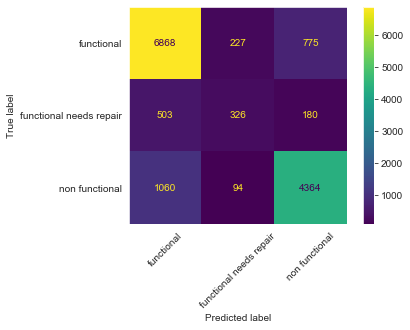

<Figure size 864x864 with 0 Axes>

In [321]:
sns.set_style('dark')
rf_pipeline = Pipeline([('ss', StandardScaler()), 
                                  ('RF', RandomForestClassifier(random_state=123, n_estimators=200))])
rf_model = rf_pipeline.fit(X_train, y_train)
plot_confusion_matrix(rf_model, X_test, y_test, xticks_rotation=45, values_format='.5g')
plt.figure(figsize=(12,12))
plt.show();

#### RF SMOTE resample

In [289]:
smote_ML(RandomForestClassifier(random_state=123, n_estimators=200))

Accuracy Score: 0.7918316315899145
                         precision    recall  f1-score   support

             functional       0.82      0.84      0.83      7870
functional needs repair       0.41      0.41      0.41      1009
         non functional       0.81      0.79      0.80      5518

               accuracy                           0.79     14397
              macro avg       0.68      0.68      0.68     14397
           weighted avg       0.79      0.79      0.79     14397

[[6616  419  835]
 [ 428  411  170]
 [ 978  167 4373]]


We were getting quite good values for functional and non functional, however the 'needs repair', even with resampling, seems to be hard to predict.

#### RF Tuning

In [290]:
newer_grid = [{'RF__max_depth': [8, 12, 16], 
         'RF__min_samples_split': [12, 16, 20], 
         'RF__criterion': ['gini', 'entropy']}]

In [291]:
gridsearch = GridSearchCV(estimator=rf_pipeline, 
                          param_grid=newer_grid, 
                          scoring='accuracy', 
                          cv=5)

In [292]:
gridsearch.fit(X_train, y_train)

gridsearch.score(X_test, y_test)

0.7978050982843647

In [293]:
gridsearch.best_params_

{'RF__criterion': 'entropy', 'RF__max_depth': 16, 'RF__min_samples_split': 12}

As the max depth best param was the highest, let's try leaving this as default, which means there is no limit to the depth of the trees. This can be prone to overfitting the model, but we are judging based on our test set values. Min_samples_split on the other hand, is the minimum number of samples required to split an internal node. Let's work at that parameter.

In [294]:
newer_grid = [{ 
         'RF__min_samples_split': [8, 10, 12], 
         'RF__criterion': ['entropy']
         }]

In [295]:
gridsearch = GridSearchCV(estimator=rf_pipeline, 
                          param_grid=newer_grid, 
                          scoring='accuracy', 
                          cv=5)

In [296]:
gridsearch.fit(X_train, y_train)

gridsearch.score(X_test, y_test)

0.8083628533722303

In [297]:
gridsearch.best_params_

{'RF__criterion': 'entropy', 'RF__min_samples_split': 8}

A bit of an improvement! Let's try one more iteration.

In [298]:
last_grid = [{ 
         'RF__min_samples_split': [6, 7, 8],
         'RF__criterion': ['entropy']
        }]

In [299]:
gridsearch = GridSearchCV(estimator=rf_pipeline, 
                          param_grid=last_grid, 
                          scoring='accuracy', 
                          cv=5)
gridsearch.fit(X_train, y_train)

gridsearch.score(X_test, y_test)

0.8083628533722303

In [300]:
gridsearch.best_params_

{'RF__criterion': 'entropy', 'RF__min_samples_split': 8}

Marginal improvement. Let's keep the model at a 7 min_samples_split. 81% which is not bad! Let's get our stats for that.

In [301]:
machine_learn(RandomForestClassifier(random_state=123, n_estimators=200,
                                min_samples_split=7, criterion='entropy'))

Accuracy Score: 0.8093352781829548
                         precision    recall  f1-score   support

             functional       0.81      0.90      0.85      7870
functional needs repair       0.59      0.29      0.39      1009
         non functional       0.83      0.78      0.81      5518

               accuracy                           0.81     14397
              macro avg       0.74      0.66      0.68     14397
           weighted avg       0.80      0.81      0.80     14397

[[7050  144  676]
 [ 532  294  183]
 [1151   59 4308]]


Although our recall for functional needs repair went down from 32%, it's precision went from 50% to 61%. Our recall went up to 90 for function, thus bumping the f1-score up 1%. The f1-score for non-functional also went up 1%, thus bumping our accuracy up 1%.

Now let's re-plot confusion matrix and then the feature importance of that model.

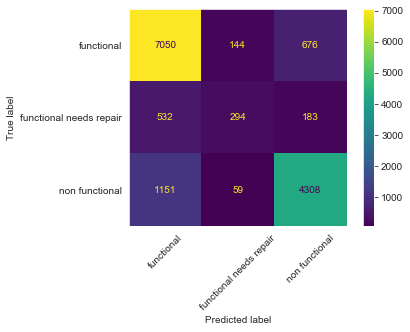

<Figure size 864x864 with 0 Axes>

In [322]:
sns.set_style('dark')
rf_pipeline = Pipeline([('ss', StandardScaler()), 
                        ('RF', RandomForestClassifier(random_state=123, 
                                n_estimators=200, min_samples_split=7,
                                criterion='entropy'))])
rf_model = rf_pipeline.fit(X_train, y_train)
plot_confusion_matrix(rf_model, X_test, y_test, xticks_rotation=45, values_format='.5g')
plt.figure(figsize=(12,12))
plt.show();

We now decipher the confusion matrix on the unseen test data. 7050 wells were correctly predicted as functional (Upper Right corner). 532 were falsely predicted as functional, when they were actually needing repair. 1151 were falsely predicted as functional when they were not functional (false positives - important in our case).


#### Best Feature Importance

In [303]:
def plot_feature_importance(model):
    sns.set_style('darkgrid')
    n_features = X_train.shape[1]
    plt.figure(figsize=(10,10))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns.values)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')

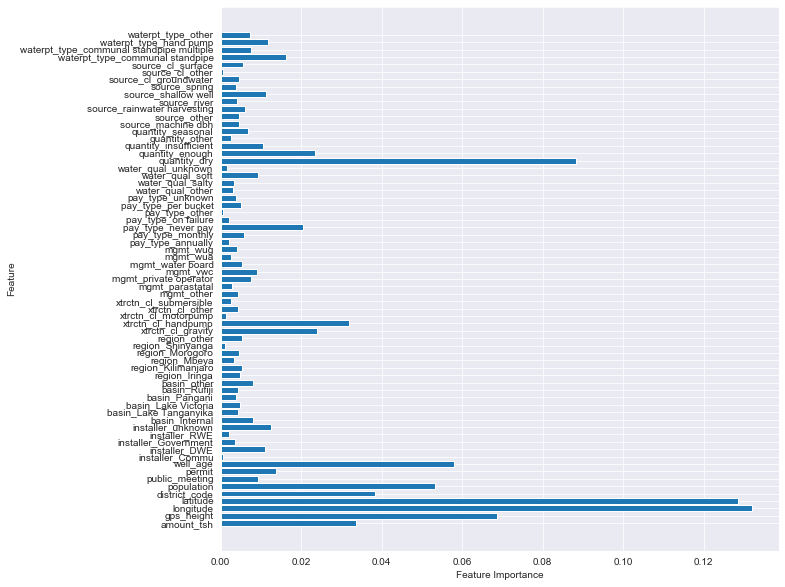

In [304]:
plot_feature_importance(rf_model[1][1])

Our Random Forest model is telling us that latitude and longitude have the most importance, then the age of the well, gps_height, and the quantity of water the pump gives out.

### XGBoost

In [305]:
machine_learn(xgb.XGBClassifier())

Accuracy Score: 0.7460582065708133
                         precision    recall  f1-score   support

             functional       0.72      0.92      0.81      7870
functional needs repair       0.67      0.10      0.18      1009
         non functional       0.82      0.61      0.70      5518

               accuracy                           0.75     14397
              macro avg       0.74      0.55      0.56     14397
           weighted avg       0.75      0.75      0.72     14397

[[7263   27  580]
 [ 737  105  167]
 [2120   25 3373]]


XGBoost suprisingly did not do as well as the others, at 74% accuracy. Let's try a decision tree for our last model.

### Decision Tree

In [306]:
dtc_model = DecisionTreeClassifier(random_state=10, criterion='entropy')  
dtc_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [307]:
dtc_pred = dtc_model.predict(X_test)

In [308]:
dtc_model.score(X_test, y_test)

0.7529346391609363

75% is ok, our Random Forests baseline model still did better (obviously because it averages multiple decision trees!).

In [309]:
print(classification_report(y_test, dtc_pred))

                         precision    recall  f1-score   support

             functional       0.80      0.79      0.80      7870
functional needs repair       0.36      0.36      0.36      1009
         non functional       0.75      0.77      0.76      5518

               accuracy                           0.75     14397
              macro avg       0.64      0.64      0.64     14397
           weighted avg       0.75      0.75      0.75     14397



Let's visualize the decision tree here for fun!

In [310]:
bigtree = plt.figure(figsize=(35,12), dpi=500)
tree.plot_tree(dtc_model, 
               feature_names=X.columns,
               class_names=np.unique(y).astype('str'),
               filled=True, rounded=True)
plt.show()

Oh... Oh my. It's a monster!! Saving.

In [311]:
bigtree.savefig("decision_tree.png")

It looks like the Random Forests model performed the best out of the 4 we tried here! Let's do some visual analysis based on the most important features for that highest performing RF model.

## Best Performing Model Visualizations

#### Water Quantity by Status

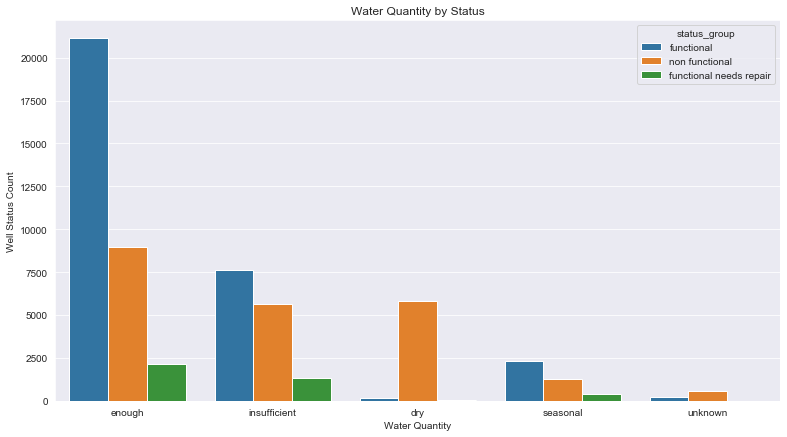

In [312]:
plt.figure(figsize=(13, 7))

sns.countplot(data=eda_data,x='quantity',hue='status_group')
plt.title('Water Quantity by Status')
plt.xlabel('Water Quantity')
plt.ylabel('Well Status Count');

#### Quantity & Location

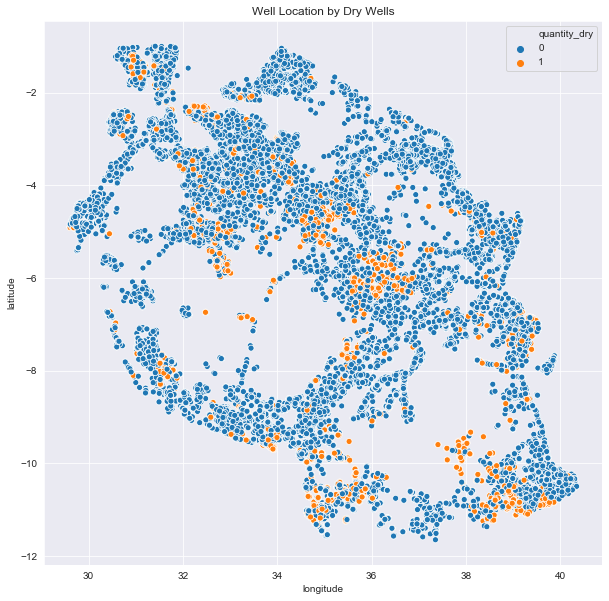

In [313]:
fig, ax = plt.subplots(figsize=(10,10))
sns.set_style('darkgrid')
sns.scatterplot(x='longitude', y='latitude', hue="quantity_dry", data=final_model_data, ax=ax)
plt.title('Well Location by Dry Wells')

plt.legend(fancybox=True);

In [314]:
graphdata = final_model_data[final_model_data.well_age >= 0]

In [315]:
graphdata

id  amount_tsh  gps_height  longitude   latitude  district_code  \
0      69572      6000.0        1390  34.938093  -9.856322              5   
1       8776         0.0        1399  34.698766  -2.147466              2   
2      34310        25.0         686  37.460664  -3.821329              4   
3      67743         0.0         263  38.486161 -11.155298             63   
4      19728         0.0           0  31.130847  -1.825359              1   
...      ...         ...         ...        ...        ...            ...   
59395  60739        10.0        1210  37.169807  -3.253847              5   
59396  27263      4700.0        1212  35.249991  -9.070629              4   
59397  37057         0.0           0  34.017087  -8.750434              7   
59398  31282         0.0           0  35.861315  -6.378573              4   
59399  26348         0.0         191  38.104048  -6.747464              2   

       population  public_meeting  permit    status_group  well_age  \
0             109            True   False      functional        12   
1             280            True    True      functional         3   
2             250            True    True      functional         4   
3              58            True    True  non functional        27   
4               0            True    True      functional        11   
...           ...             ...     ...             ...       ...   
59395         125            True    True      functional        14   
59396          56            True    True      functional        15   
59397           0            True   False      functional        11   
59398           0            True    True      functional        11   
59399         150            True    True      functional         9   

       installer_Commu  installer_DWE  installer_Government  installer_RWE  \
0                    0              0                     0              0   
1                    0              0                     0              0   
2                    0              0                     0              0   
3                    0              0                     0              0   
4                    0              0                     0              0   
...                ...            ...                   ...            ...   
59395                0              0                     0              0   
59396                0              0                     0              0   
59397                0              0                     0              0   
59398                0              0                     0              0   
59399                0              0                     0              0   

       installer_unknown  basin_Internal  basin_Lake Tanganyika  \
0                      1               0                      0   
1                      1               0                      0   
2                      1               0                      0   
3                      1               0                      0   
4                      1               0                      0   
...                  ...             ...                    ...   
59395                  1               0                      0   
59396                  1               0                      0   
59397                  1               0                      0   
59398                  1               0                      0   
59399                  1               0                      0   

       basin_Lake Victoria  basin_Pangani  basin_Rufiji  basin_other  \
0                        0              0             0            1   
1                        1              0             0            0   
2                        0              1             0            0   
3                        0              0             0            1   
4                        1              0             0            0   
...                    ...            ...           ...   

#### Age, Location & Functionality

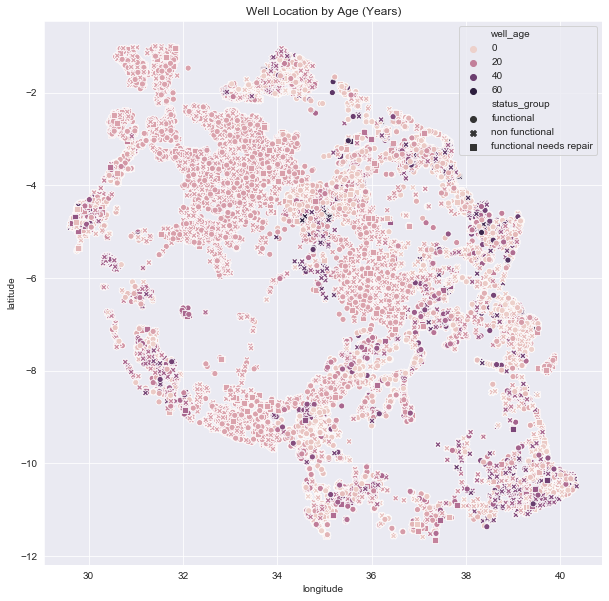

In [316]:
fig, ax = plt.subplots(figsize=(10,10))
sns.set_style('darkgrid')
sns.scatterplot(x='longitude', y='latitude', hue="well_age", style='status_group', data=graphdata, ax=ax)
plt.title('Well Location by Age (Years)')

plt.legend(fancybox=True);

We can see orange clusters of dried-up wells in the bottom of the map, and in the middle as well. The further away from the water seems to have more dry wells.

#### Well Status by Age

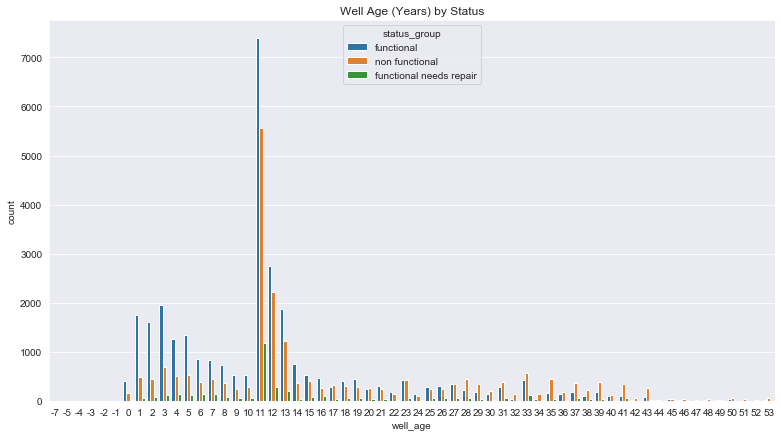

In [317]:
plt.figure(figsize=(13, 7))

sns.countplot(data=model_data13,x='well_age',hue='status_group')
plt.title('Well Age (Years) by Status');

Because there were so many missing values for construction_year, for which we imputed our '0' values earlier on, our data has a huge spike in well_age of the median value, 11 years. Let's remake a this chart excluding the missing/imputed values.

In [318]:
newagedata = df.merge(labels, on='id')
newagedata = newagedata[newagedata.construction_year != 0]
newagedata.date_recorded = pd.to_datetime(newagedata.date_recorded)
newagedata['well_age'] = newagedata.date_recorded.dt.year - newagedata.construction_year
newagedata = newagedata[newagedata.well_age >= 0]

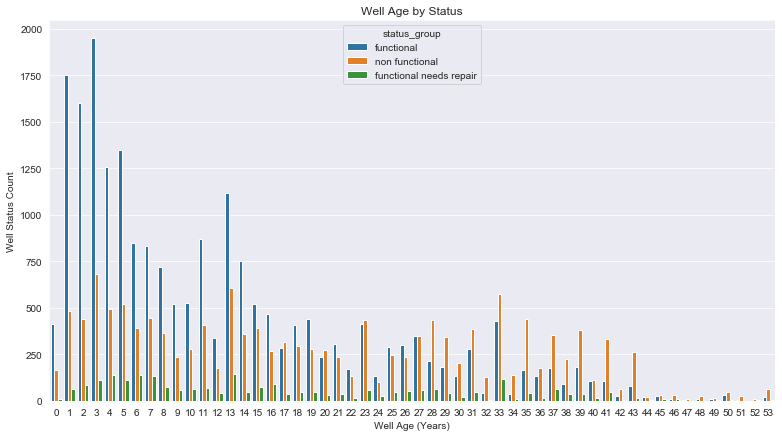

In [319]:
plt.figure(figsize=(13, 7))

sns.countplot(data=newagedata,x='well_age',hue='status_group')
plt.title('Well Age by Status')
plt.xlabel('Well Age (Years)')
plt.ylabel('Well Status Count');

#### Extraction Type Class by Functionality

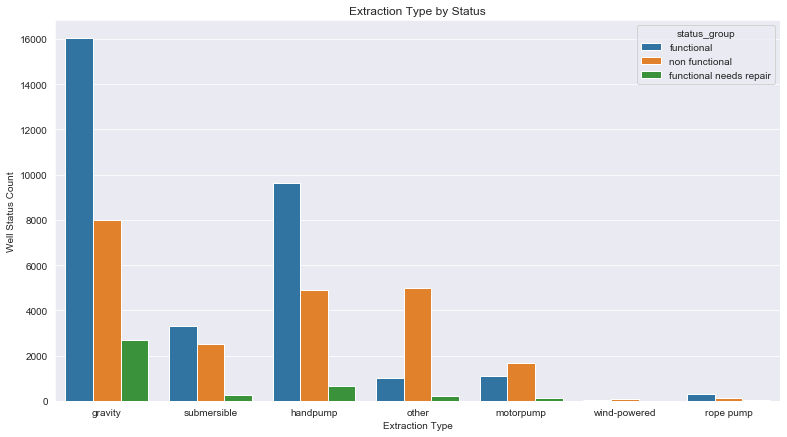

In [320]:
plt.figure(figsize=(13, 7))

sns.countplot(data=data, x='extraction_type_class',hue='status_group')
plt.title('Extraction Type by Status')
plt.xlabel('Extraction Type')
plt.ylabel('Well Status Count');